In [89]:
# importing the required libraries 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import sklearn
from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split   #train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge #Ridge and Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [92]:
df = pd.read_csv("C:\\Users\\gouse\\Downloads\\train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [93]:
##Check shape of the dataset
total_records= df.shape[0]  #storing total no. of records in a variable
df.shape

(1460, 81)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [95]:
##Stripping off white_spaces from the column name(if any)
df = df.rename(columns= lambda x: x.strip(), inplace=False)

In [96]:
##Checking and dropping duplicated records(if any)
df = df.drop_duplicates()

In [97]:
##Check null values if any(column wise: missing value percentage)
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0])
missing

0
LotFrontage   17.74
Alley         93.77
MasVnrType     0.55
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
FireplaceQu   47.26
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55
PoolQC        99.52
Fence         80.75
MiscFeature   96.30

In [98]:
#missing values dataframe (sorting values for graph)
my_cols = missing.index
vals = missing[0]
missing_df = pd.DataFrame({'features':my_cols,'percent':vals})
missing_df = missing_df.sort_values(by='percent', ascending=False)

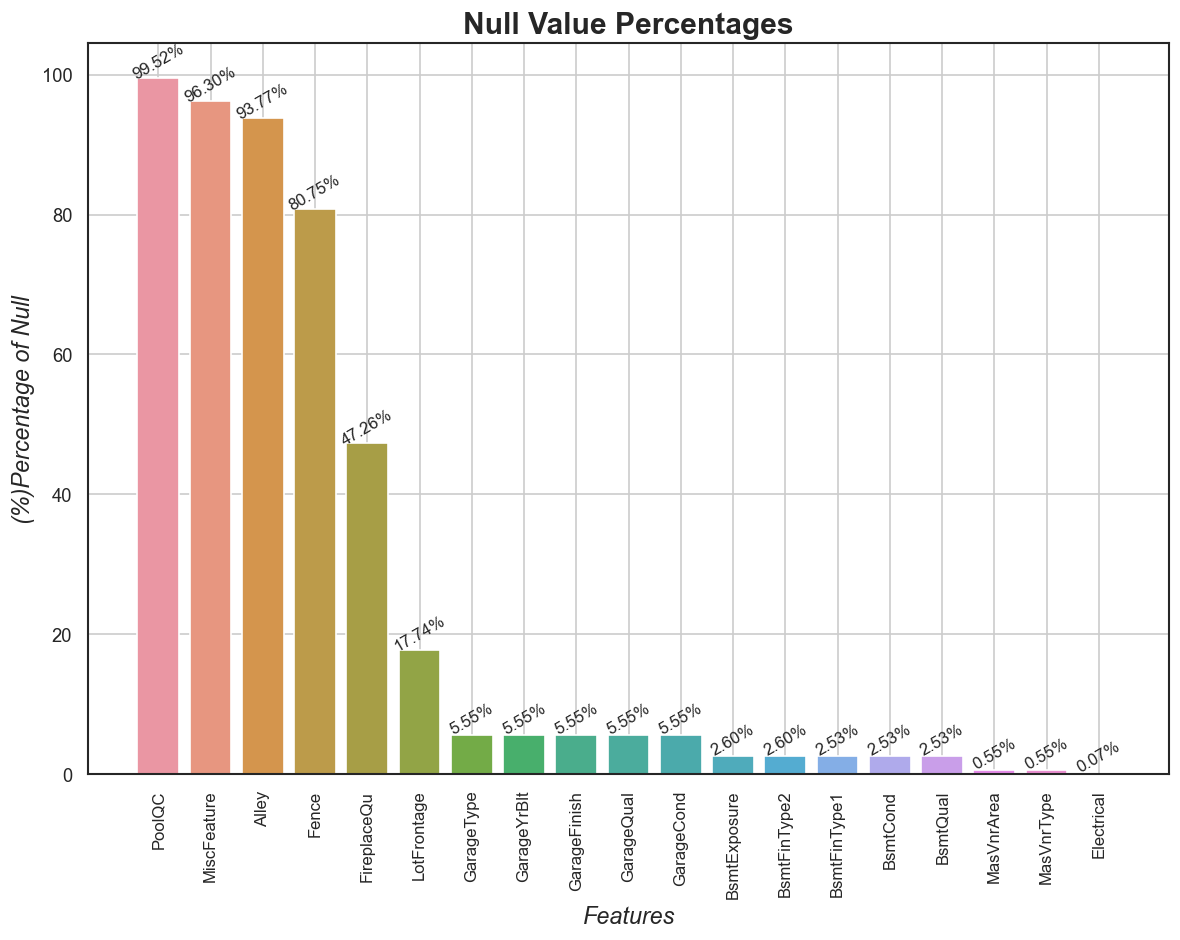

In [99]:
##'Null Values Percentages' in the housing dataset, df: Barplot
sns.set(style='white')
plt.figure(figsize=(10,8), dpi=120)
ax_x= sns.barplot(x=missing_df.features, y=missing_df.percent)

for p in ax_x.patches:
    ax_x.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize =10, rotation=30)
plt.xticks(rotation=90, fontsize=10)        
plt.xlabel('Features', fontsize= 14, fontstyle='italic')
plt.ylabel('(%)Percentage of Null' , fontsize= 14, fontstyle='italic')
plt.title('Null Value Percentages', fontsize=18,fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

In [100]:
##Inspecting null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns and their null value %
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Alley           93.77
MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [101]:
##Considering the aspect of 'meaningful missing'. Replace nulls with 'None' where null implies absence of feature (from data dictionary)

cat_null_obj_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','Electrical']
for column in cat_null_obj_cols:
    df[column]= df[column].fillna('None')

In [102]:
##Inspecting null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [103]:
##Removing categorical features that have more than 80% data associated to one single value.

def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
df = df.drop(columns_to_be_removed, axis=1)
df.head()

Categorical object type columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  24 



Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  WoodDeckSF  OpenPorchSF  \
0      CollgCr     2Story            7  ...           0           61   
1      Veenker     1Story            6  ...         298            0   
2      CollgCr     2Story            7  ...           0           42   
3      Crawfor     2Story            7  ...           0           35   
4      NoRidge     2Story            8  ...         192           84   

   EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal  MoSold YrSold  \
0              0         0           0        0       0       2   2008   
1              0         0           0        0       0       5   2007   
2              0         0           0        0       0       9   2008   
3            272         0           0        0       0       2   2006   
4              0         0           0        0       0      12   2008   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 57 columns]

In [104]:
df.shape

(1460, 57)

In [105]:
##Recheck null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [106]:
##Creating a dataframe 'df_obj_cat' with object type categorical variables
obj_type_cat = df.select_dtypes(include='object').columns
df_obj_cat = df.loc[:,obj_type_cat]
df_obj_cat.head()

MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
0       RL      Reg    Inside      CollgCr     2Story     Gable     VinylSd   
1       RL      Reg       FR2      Veenker     1Story     Gable     MetalSd   
2       RL      IR1    Inside      CollgCr     2Story     Gable     VinylSd   
3       RL      IR1    Corner      Crawfor     2Story     Gable     Wd Sdng   
4       RL      IR1       FR2      NoRidge     2Story     Gable     VinylSd   

  Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd    BrkFace        Gd      PConc       Gd           No   
1     MetalSd       None        TA     CBlock       Gd           Gd   
2     VinylSd    BrkFace        Gd      PConc       Gd           Mn   
3     Wd Shng       None        TA     BrkTil       TA           No   
4     VinylSd    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType GarageFinish  
0          GLQ        Ex          Gd        None     Attchd          RFn  
1          ALQ        Ex          TA          TA     Attchd          RFn  
2          GLQ        Ex          Gd          TA     Attchd          RFn  
3          ALQ        Gd          Gd          Gd     Detchd          Unf  
4          GLQ        Ex          Gd          TA     Attchd          RFn

In [107]:
df_obj_cat.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')

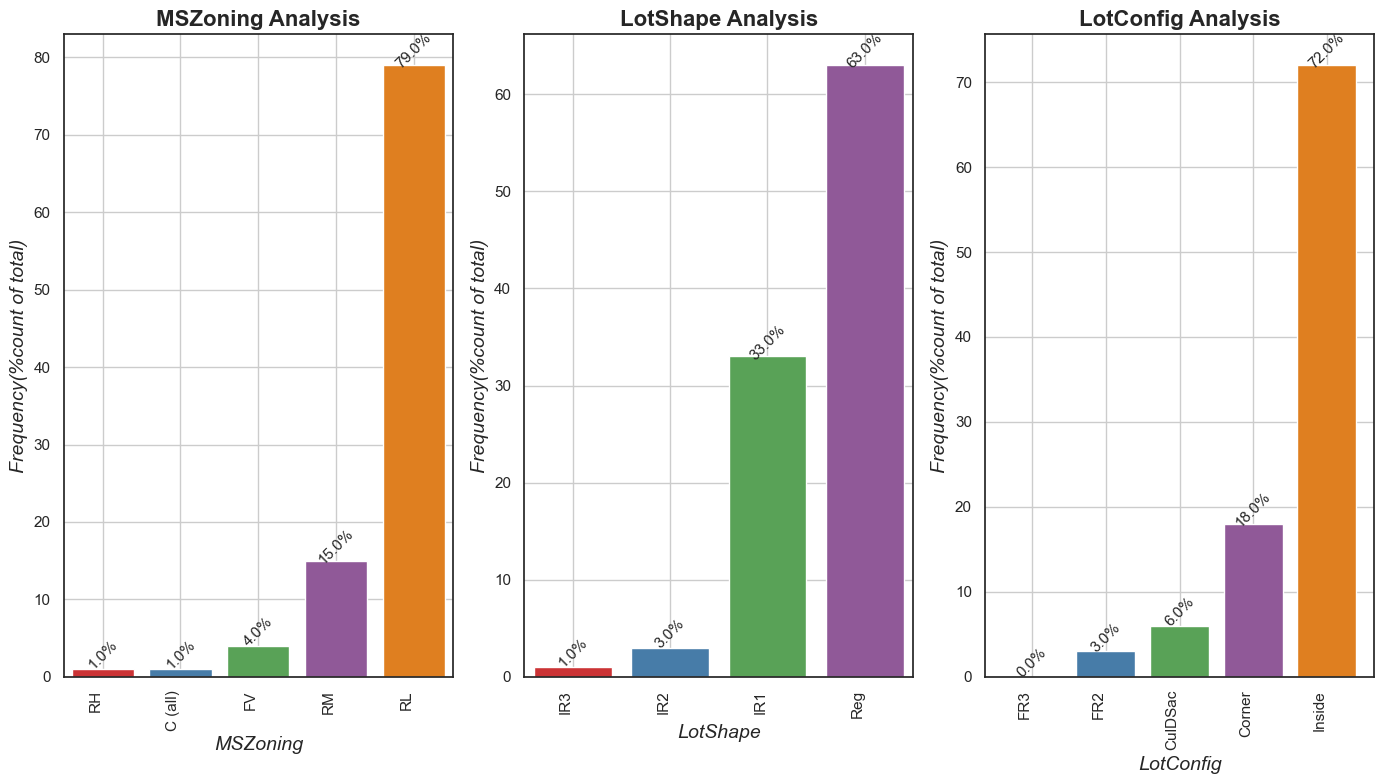

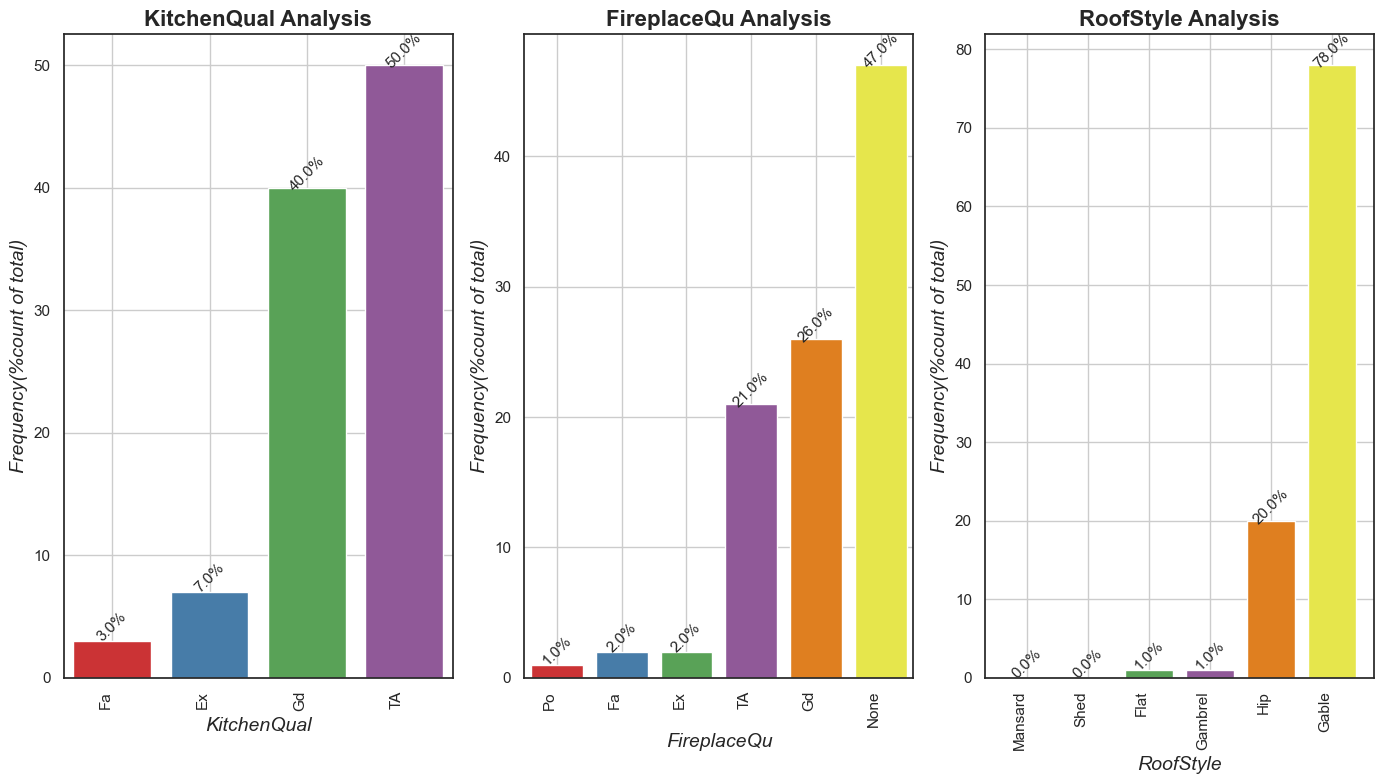

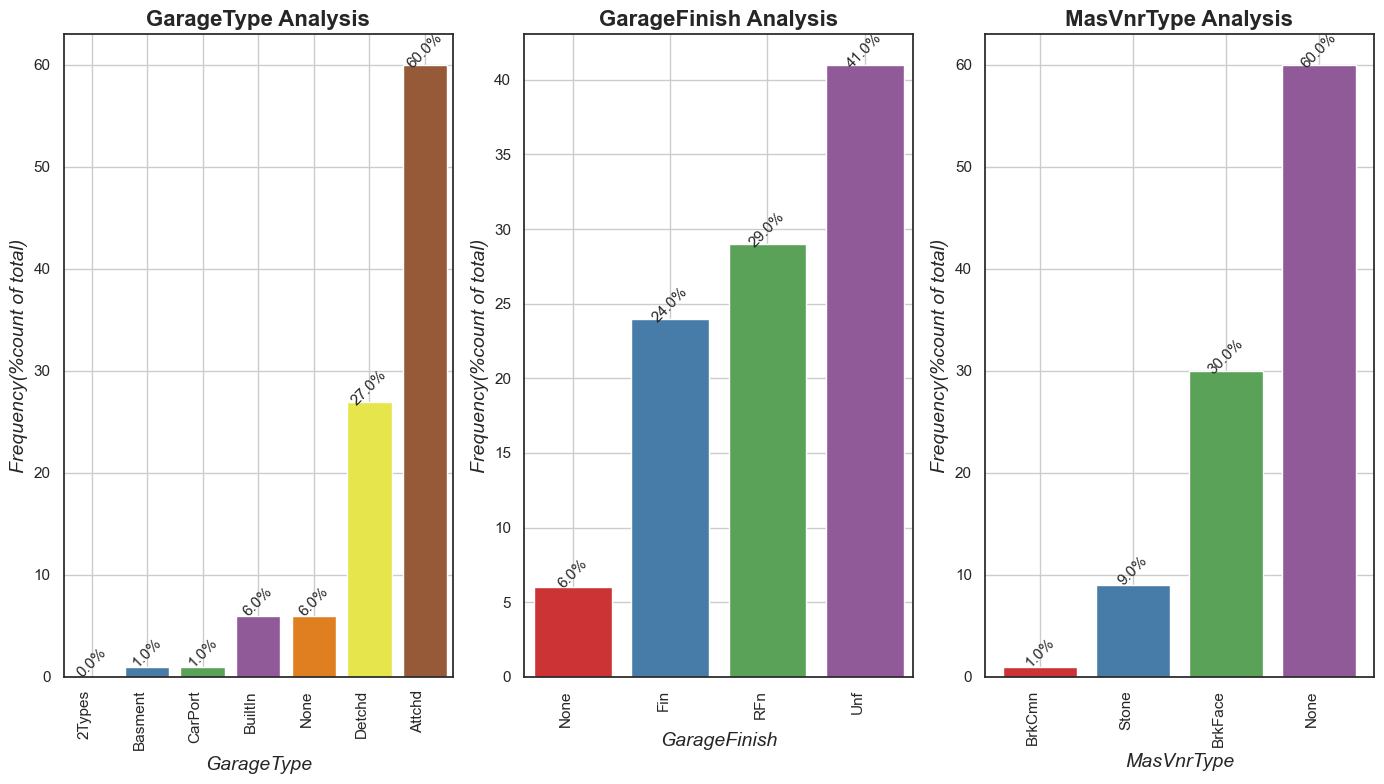

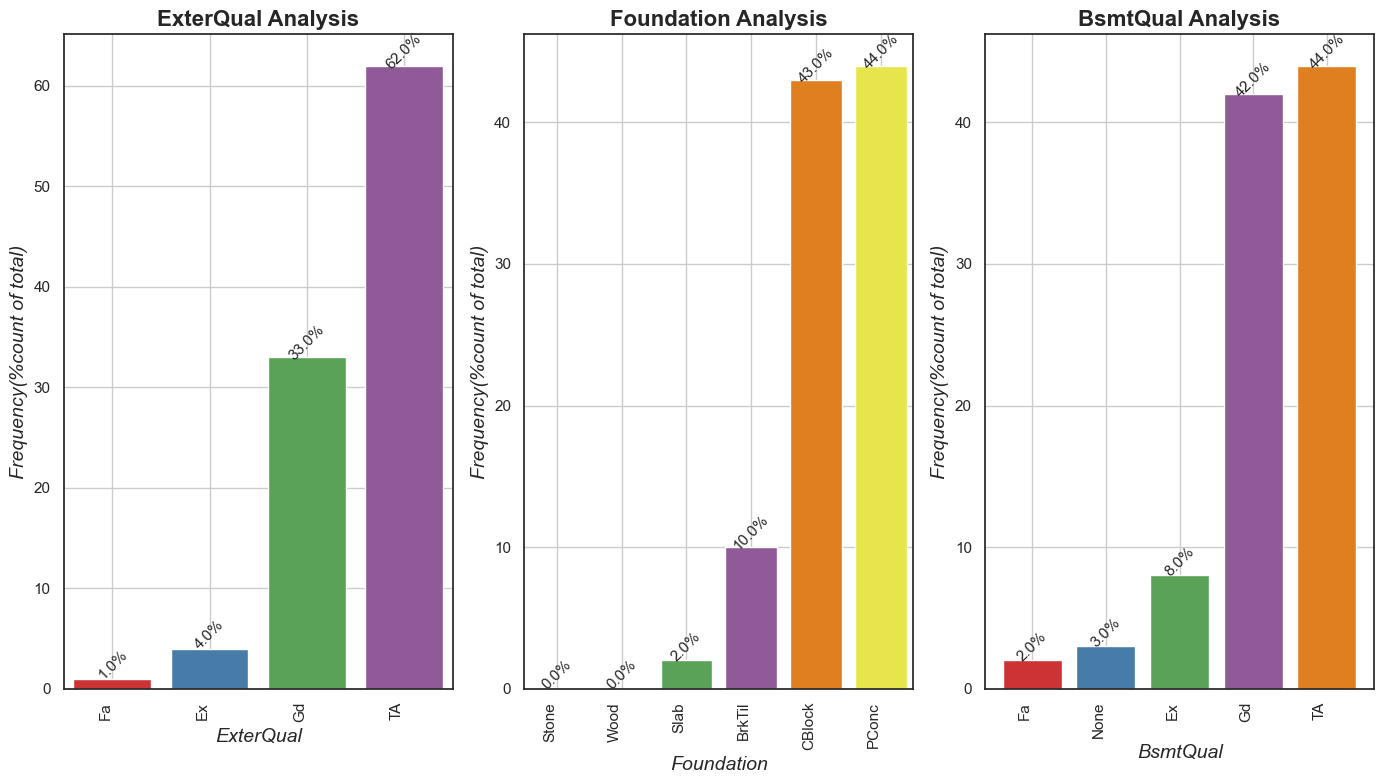

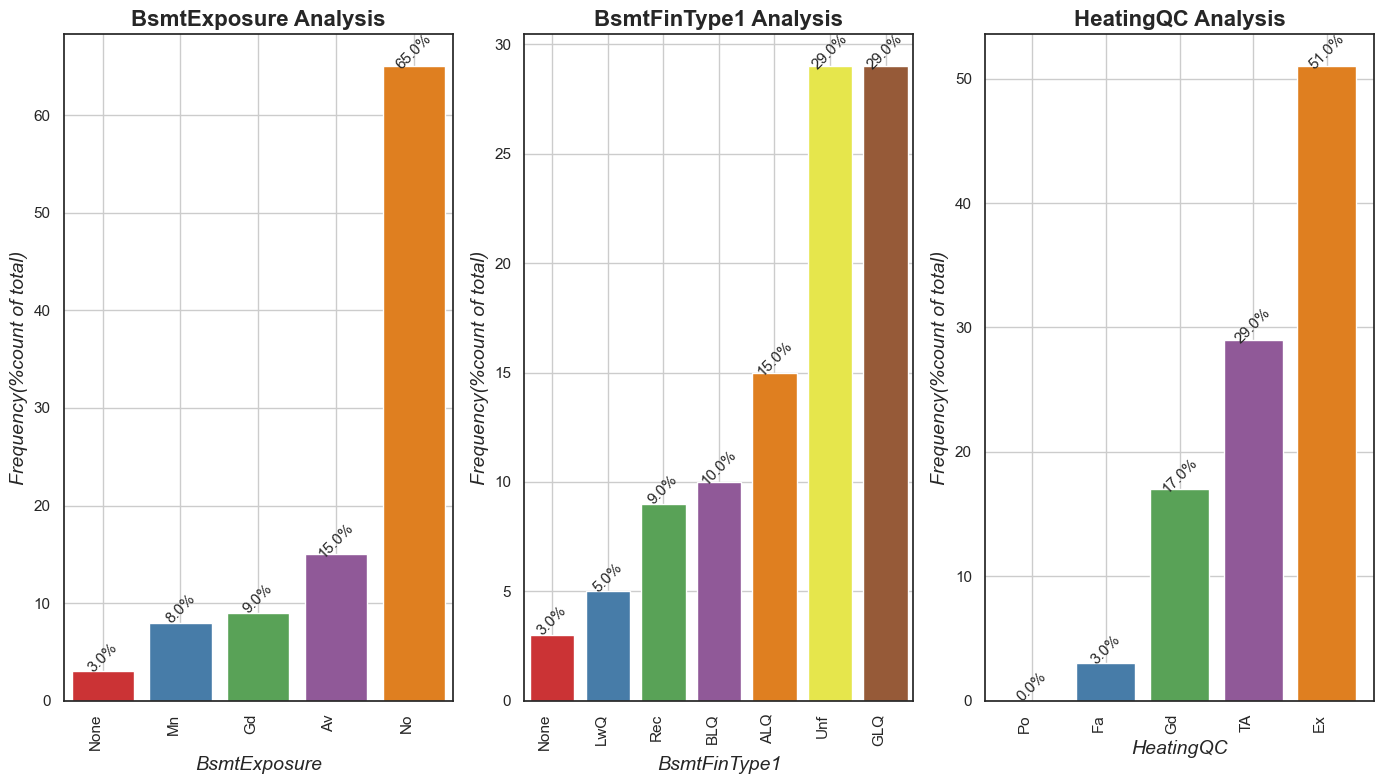

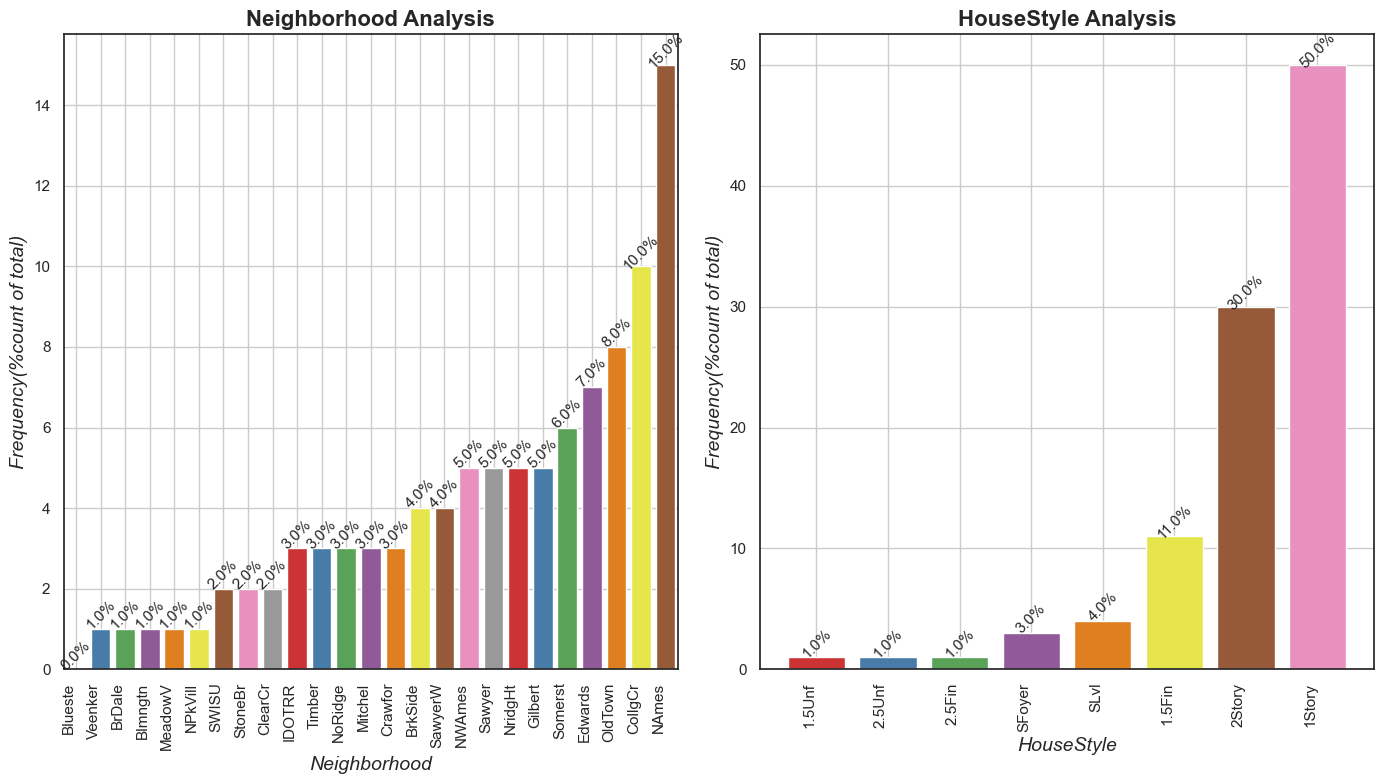

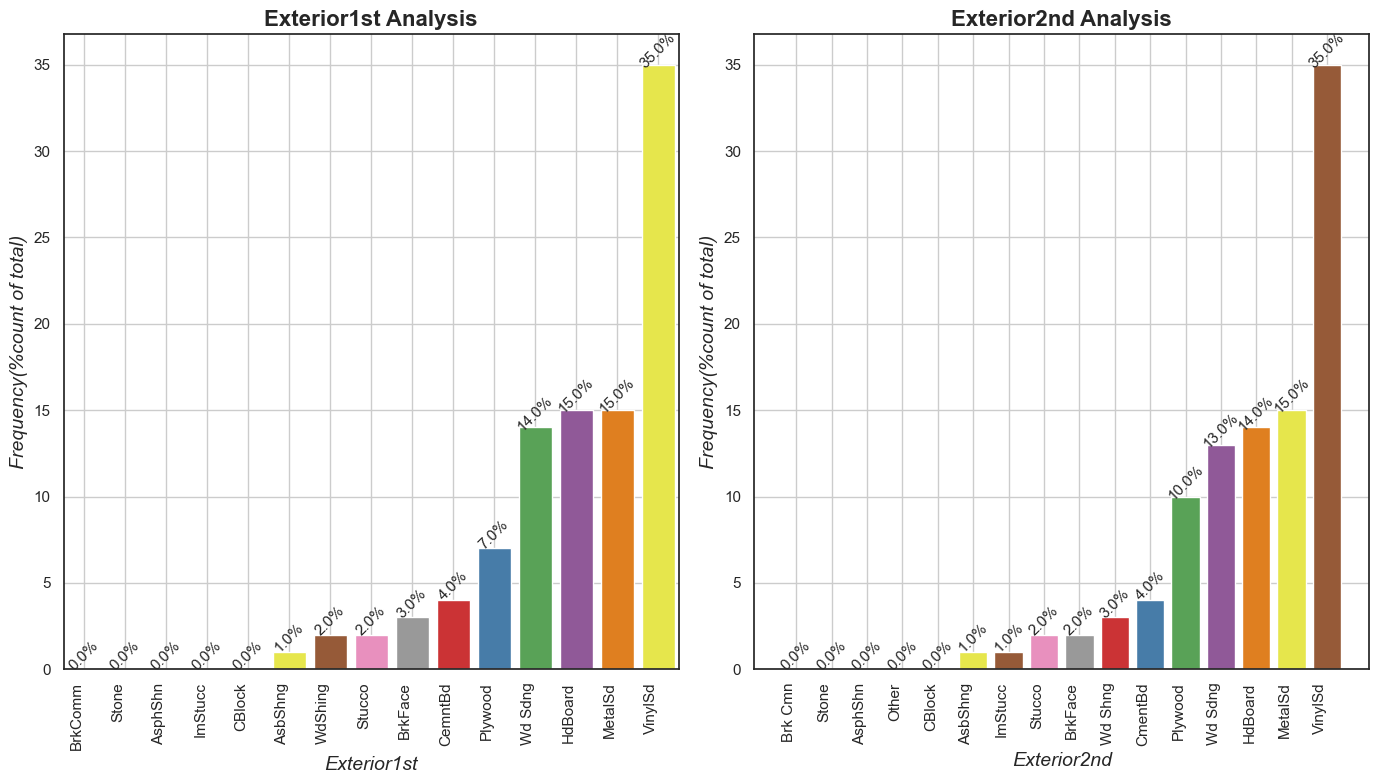

In [108]:
##Creating a function for 'categorical_freq_prcnt_plt'
def categorical_freq_prcnt_plt(data,f1,f2,f3):
    if(f3!=0):
        df= data.copy()
        sns.set(style='white')
        plt.figure(figsize=(14, 8), dpi=100)
        
        plt.subplot(131)  #subplot(131)
        ab = pd.DataFrame((df[f1].value_counts(normalize=True)*100).round(0).sort_values())
        ab.reset_index(inplace=True)
        ab1 = sns.barplot(x='index',y=f1, data=ab, palette='Set1')
        
        plt.setp(ab1.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f1, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f1+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab1.patches:
            ab1.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(132)  #subplot(132)
        cn = pd.DataFrame((df[f2].value_counts(normalize=True)*100).round(0).sort_values())
        cn.reset_index(inplace=True)
        ab2 = sns.barplot(x='index',y=f2, data=cn, palette='Set1')
        
        plt.setp(ab2.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f2, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f2+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab2.patches:
            ab2.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(133)  #subplot(133)
        ef = pd.DataFrame((df[f3].value_counts(normalize=True)*100).round(0).sort_values())
        ef.reset_index(inplace=True)
        ab3 = sns.barplot(x='index',y=f3, data=ef, palette='Set1')
        
        plt.setp(ab3.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f3, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f3+' Analysis', fontsize=16, fontweight='bold')
        
        for i in ab3.patches:
            ab3.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
            
        plt.grid(True)
        plt.tight_layout()
        plt.autoscale()
        plt.show()
    else:
        df= data.copy()
        sns.set(style='white')
        plt.figure(figsize=(14, 8), dpi=100)
        
        plt.subplot(121)  #subplot(121)
        ab = pd.DataFrame((df[f1].value_counts(normalize=True)*100).round(0).sort_values())
        ab.reset_index(inplace=True)
        ab1 = sns.barplot(x='index',y=f1, data=ab, palette='Set1')
        
        plt.setp(ab1.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f1, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f1+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab1.patches:
            ab1.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(122)  #subplot(122)
        cn = pd.DataFrame((df[f2].value_counts(normalize=True)*100).round(0).sort_values())
        cn.reset_index(inplace=True)
        ab2 = sns.barplot(x='index',y=f2, data=cn, palette='Set1')
        
        plt.setp(ab2.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f2, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f2+' Analysis', fontsize=16, fontweight='bold')
        
        for i in ab2.patches:
            ab2.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.grid(True)
        plt.tight_layout()
        plt.autoscale()
        plt.show()
        
    
categorical_freq_prcnt_plt(df,'MSZoning','LotShape','LotConfig')
categorical_freq_prcnt_plt(df,'KitchenQual', 'FireplaceQu','RoofStyle')
categorical_freq_prcnt_plt(df,'GarageType', 'GarageFinish', 'MasVnrType')
categorical_freq_prcnt_plt(df,'ExterQual','Foundation', 'BsmtQual')
categorical_freq_prcnt_plt(df,'BsmtExposure', 'BsmtFinType1', 'HeatingQC')
categorical_freq_prcnt_plt(df, 'Neighborhood', 'HouseStyle',0)
categorical_freq_prcnt_plt(df,'Exterior1st', 'Exterior2nd', 0) 

In [109]:
##Inspecting null values in the numeric columns.

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [110]:
print("LotFrontage Stats:\n",df.LotFrontage.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))
print("\nMasVnrArea Stats:\n",df.MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))

LotFrontage Stats:
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
85%        90.000000
90%        96.000000
95%       107.000000
98%       124.000000
99%       141.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64

MasVnrArea Stats:
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
85%       262.350000
90%       335.000000
95%       456.000000
98%       650.980000
99%       791.920000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [111]:
##For 'MasVnrArea', finding the median by removing all the values at 0.0 percentile to get a more precise value.
updated_MasVnrArea = df.MasVnrArea[~(df.MasVnrArea==0)]
print("\nMasVnrArea Stats:\n",updated_MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))


MasVnrArea Stats:
 count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [112]:
##Impute the null values with median values for 'LotFrontage' and 'MasVnrArea' columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())

In [113]:
##Filling the null values with 0 for 'GarageYrBlt' for now as we would be handling this column further below

df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [114]:
##Recheck null values in the numeric columns.

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

Series([], dtype: float64)

In [115]:
##Create a new column named 'WhetherRemodelled': This column would determine whether the house has been remodelled or not based on 'YearBuilt' anf 'YearRemodAdd' 

def Remodel_Check(row):     ##Based on the difference between remodelled and built years
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     #Indicate not Remodelled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     #Indicated Remodelled
    else:
        return 2    #Any other observation check
    
df['WhetherRemodelled'] = df.apply(Remodel_Check, axis=1)
df.head()    

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  OpenPorchSF  EnclosedPorch  \
0      CollgCr     2Story            7  ...           61              0   
1      Veenker     1Story            6  ...            0              0   
2      CollgCr     2Story            7  ...           42              0   
3      Crawfor     2Story            7  ...           35            272   
4      NoRidge     2Story            8  ...           84              0   

   3SsnPorch ScreenPorch PoolArea MiscVal MoSold  YrSold SalePrice  \
0          0           0        0       0      2    2008    208500   
1          0           0        0       0      5    2007    181500   
2          0           0        0       0      9    2008    223500   
3          0           0        0       0      2    2006    140000   
4          0           0        0       0     12    2008    250000   

  WhetherRemodelled  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  

[5 rows x 58 columns]

In [116]:
##Confirmed: no wrong entries with value '2'. Hence, 0 if not remodelled and 1 if remodelled.
df.WhetherRemodelled.value_counts()

0    764
1    696
Name: WhetherRemodelled, dtype: int64

In [117]:
##Derive a new variable named 'AgeofProperty' to determine the age of property since the built

def find_age_since_built(row):
        return row['YrSold'] - row['YearBuilt']
    
df['AgeofProperty'] = df.apply(find_age_since_built, axis=1)
df.head()  

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  EnclosedPorch  3SsnPorch  \
0      CollgCr     2Story            7  ...              0          0   
1      Veenker     1Story            6  ...              0          0   
2      CollgCr     2Story            7  ...              0          0   
3      Crawfor     2Story            7  ...            272          0   
4      NoRidge     2Story            8  ...              0          0   

   ScreenPorch PoolArea MiscVal MoSold YrSold  SalePrice WhetherRemodelled  \
0            0        0       0      2   2008     208500                 0   
1            0        0       0      5   2007     181500                 0   
2            0        0       0      9   2008     223500                 1   
3            0        0       0      2   2006     140000                 1   
4            0        0       0     12   2008     250000                 0   

  AgeofProperty  
0             5  
1            31  
2             7  
3            91  
4             8  

[5 rows x 59 columns]

In [118]:
##Dropping the raw attributes from which the new features were derived. These aren't necessary for analysis
##Dropping 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'

df = df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  OpenPorchSF EnclosedPorch  \
0      CollgCr     2Story            7  ...           61             0   
1      Veenker     1Story            6  ...            0             0   
2      CollgCr     2Story            7  ...           42             0   
3      Crawfor     2Story            7  ...           35           272   
4      NoRidge     2Story            8  ...           84             0   

  3SsnPorch ScreenPorch PoolArea  MiscVal MoSold SalePrice WhetherRemodelled  \
0         0           0        0        0      2    208500                 0   
1         0           0        0        0      5    181500                 0   
2         0           0        0        0      9    223500                 1   
3         0           0        0        0      2    140000                 1   
4         0           0        0        0     12    250000                 0   

  AgeofProperty  
0             5  
1            31  
2             7  
3            91  
4             8  

[5 rows x 55 columns]

In [119]:
df.shape

(1460, 55)

In [120]:
##Removing numeric attributes that have more than 80% data associated to one single value.

def get_num_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    num_cols = df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
num_cols_to_be_removed = get_num_cols_imbal(data=df, prcnt=80)  
print("Numeric columns removed:",num_cols_to_be_removed)
print("\nNumber of numeric columns removed: ", len(num_cols_to_be_removed),"\n")


##Dropping columns with skewed data (int and float type numeric variables)
df = df.drop(num_cols_to_be_removed, axis=1)
df.head()

Numeric columns removed: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of numeric columns removed:  9 



Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  GarageType GarageFinish  \
0      CollgCr     2Story            7  ...      Attchd          RFn   
1      Veenker     1Story            6  ...      Attchd          RFn   
2      CollgCr     2Story            7  ...      Attchd          RFn   
3      Crawfor     2Story            7  ...      Detchd          Unf   
4      NoRidge     2Story            8  ...      Attchd          RFn   

  GarageCars GarageArea WoodDeckSF  OpenPorchSF MoSold SalePrice  \
0          2        548          0           61      2    208500   
1          2        460        298            0      5    181500   
2          2        608          0           42      9    223500   
3          3        642          0           35      2    140000   
4          3        836        192           84     12    250000   

  WhetherRemodelled AgeofProperty  
0                 0             5  
1                 0            31  
2                 1             7  
3                 1            91  
4                 0             8  

[5 rows x 46 columns]

In [121]:
##Reheck for percentage of null values in the entire dataframe
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = missing_val_cols_prcnt[missing_val_cols_prcnt!=0]
missing

Series([], dtype: float64)

In [122]:
df.shape

(1460, 46)

In [123]:
##Numeric cateogorical variables
numeric_cat_cols = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',\
                    'TotRmsAbvGrd','Fireplaces','GarageCars','WhetherRemodelled']

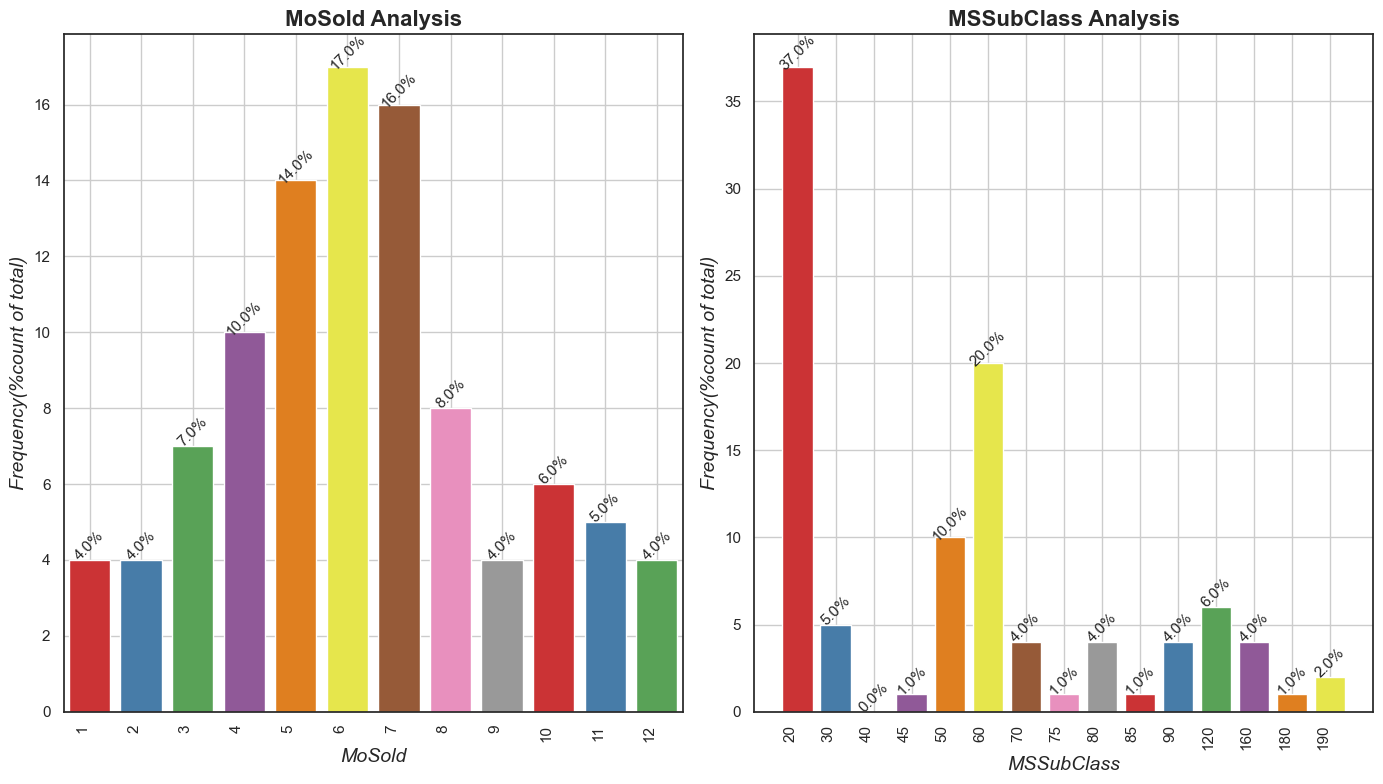

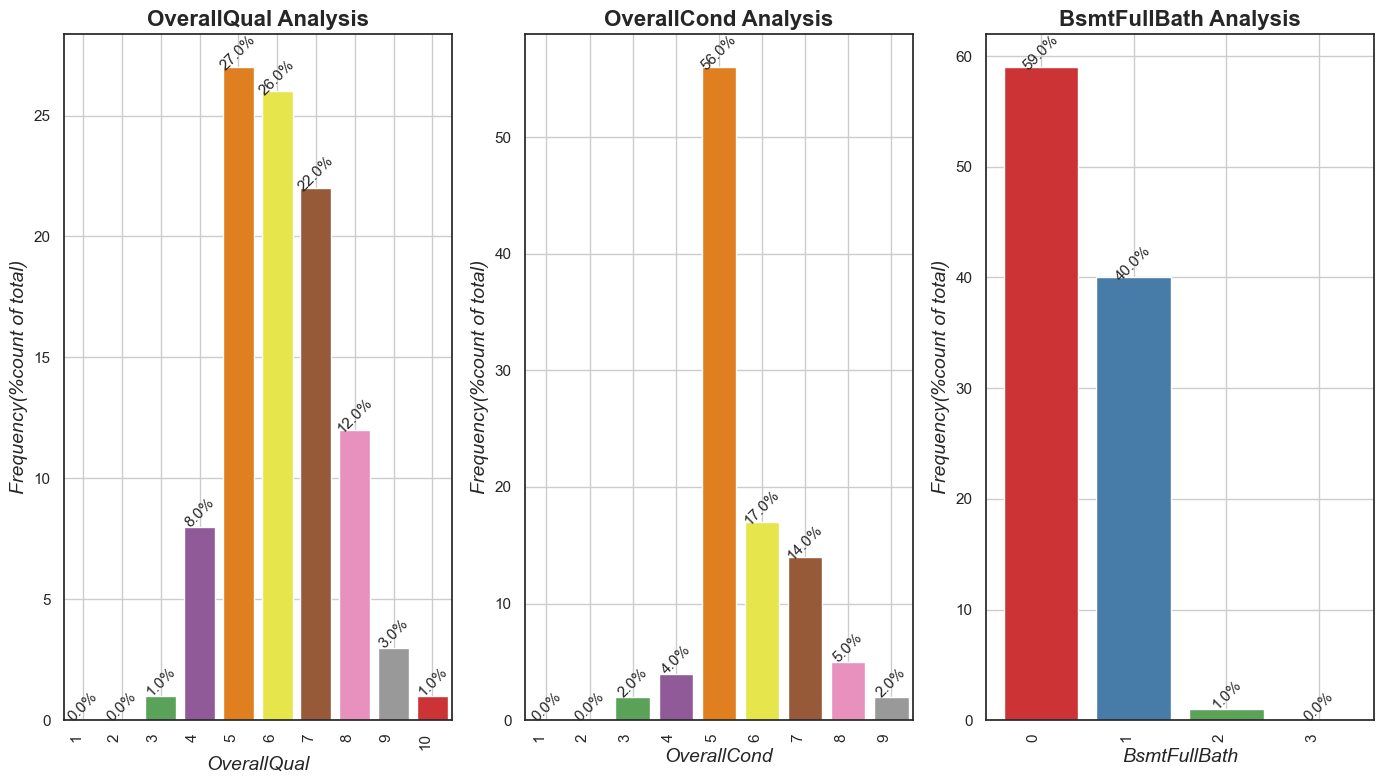

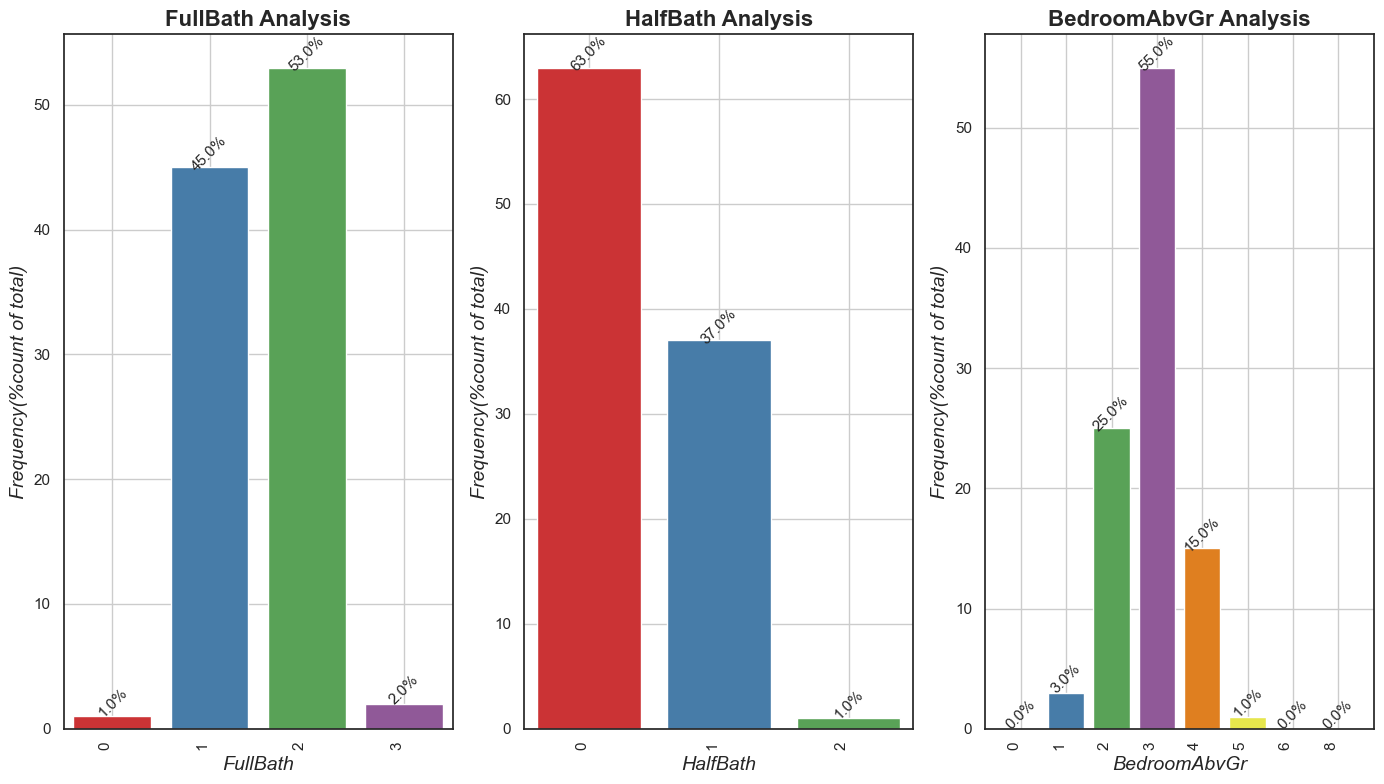

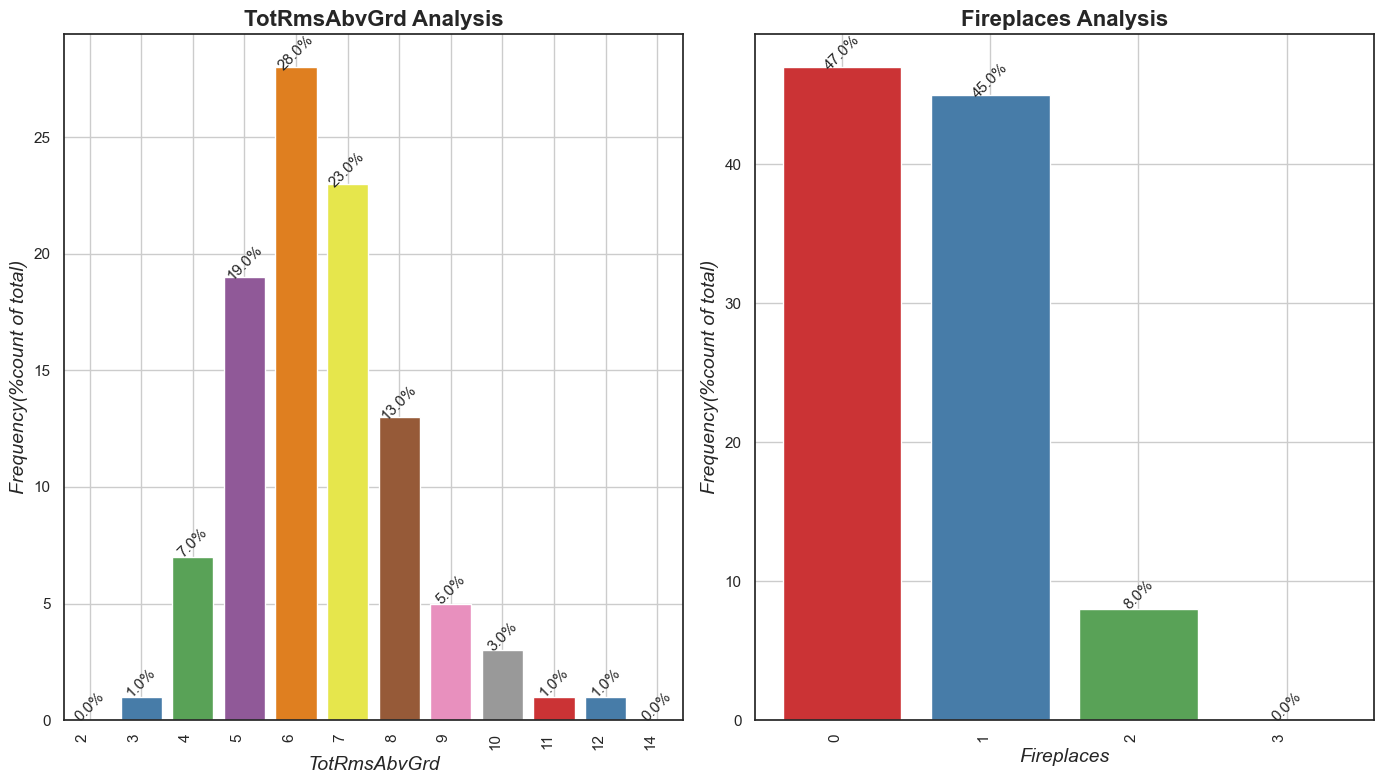

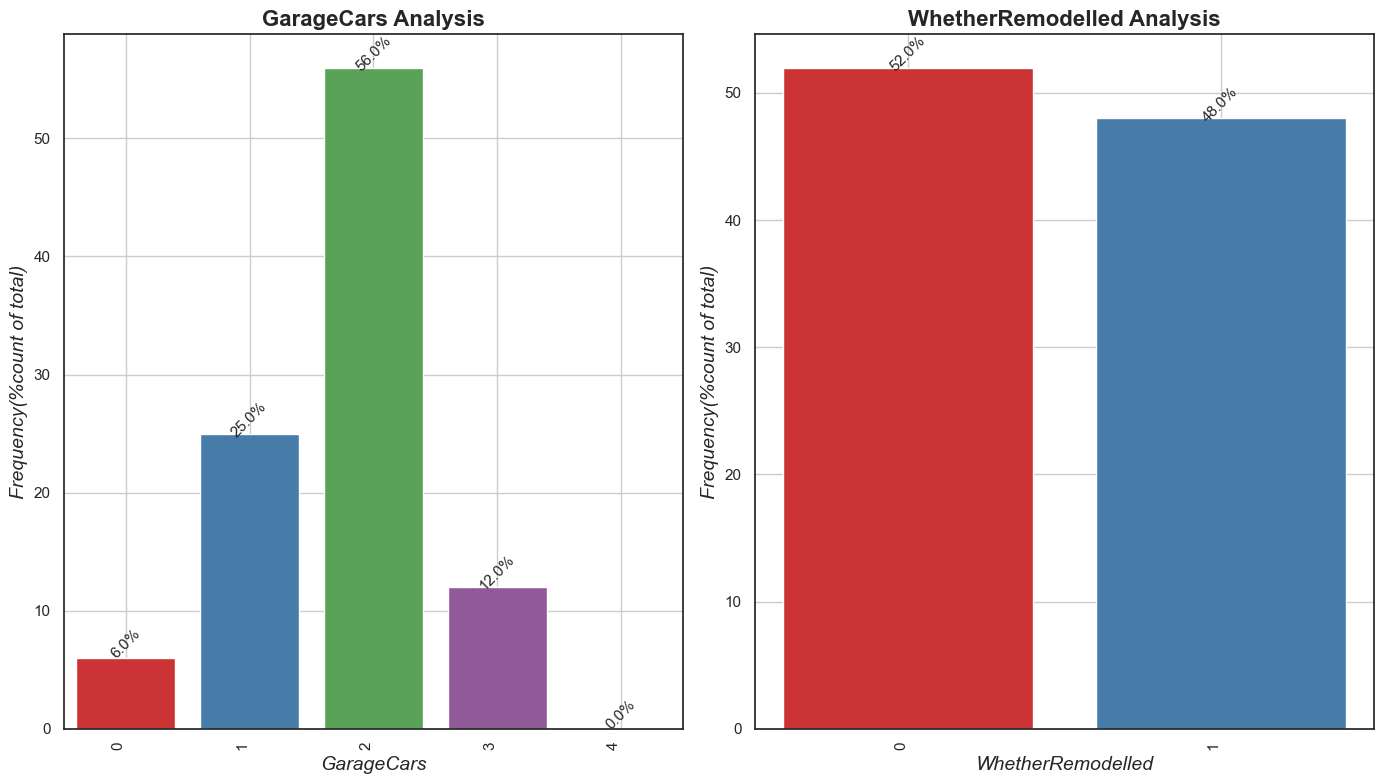

In [124]:
categorical_freq_prcnt_plt(df, 'MoSold', 'MSSubClass',0)
categorical_freq_prcnt_plt(df, 'OverallQual','OverallCond','BsmtFullBath')
categorical_freq_prcnt_plt(df, 'FullBath','HalfBath','BedroomAbvGr')
categorical_freq_prcnt_plt(df, 'TotRmsAbvGrd','Fireplaces',0)
categorical_freq_prcnt_plt(df, 'GarageCars','WhetherRemodelled',0)

In [125]:
##Removing 'Id' and 'MoSold' columns as they are trivial for our analysis
df = df.drop(['Id','MoSold'], axis=1)

In [126]:
##Check outliers
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
10%      20.000000    49.000000    5000.000000     5.000000     5.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
98%     188.200000   120.820000   25251.620000     9.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
100%    190.000000   313.000000  215245.000000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    104.229452   443.639726   567.240411  1057.429452  1162.626712  ...   
std     180.717988   456.098091   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
10%       0.000000     0.000000    74.900000   636.900000   756.900000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000  ...   
75%     168.000000   712.250000   808.000000  1298.250000  1391.250000  ...   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000  ...   
98%     650.820000  1442.640000  1678.200000  2001.640000  2072.280000  ...   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000  ...   
100%   1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

       BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       2.866438      6.517808     0.613014     1.767123   472.980137   
std        0.815778      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
10%        2.000000      5.000000     0.000000     1.000000   240.000000   
25%        2.000000      5.000000     0.000000     1.000000   334.500000   
50%        3.000000      6.000000     1.000000     2.000000   480.000000   
75%        3.000000      7.000000     1.000000     2.000000   576.000000   
95%        4.000000     10.000000     2.000000     3.000000   850.100000   
98%        4.000000     10.820000     2.000000     3.000000   907.460000   
99%        5.000000     11.000000     2.000000     3.000000  1002.790000   
100%       8.000000     14.000000     3.000000     4.000000  1418.000000   
max        8.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF      SalePrice  WhetherRemodelled  \
count  1460.000000  1460.000000    1460.000000        1460.000000   
mean     94.244521    46.660274  180921.195890           0.476712   
std     125.338794    66.256028   79442.502883           0.499629   
min       0.000000     0.000000   34900.000000           0.000000   
10%       0.000000     0.000000  106475.000000           0.000000   
25%       0.000000     0.000000  129975.000000           0.000000   
50%       0.000000    25.000000  163000.000000           0.000000   
75%     168.000000    68.000000  214000.000000           1.000000   
95%     335.000000   175.050000  326100.000000           1.000000   
98%     430.100000   240.820000  394931.060000           1.000000   
99%     505.

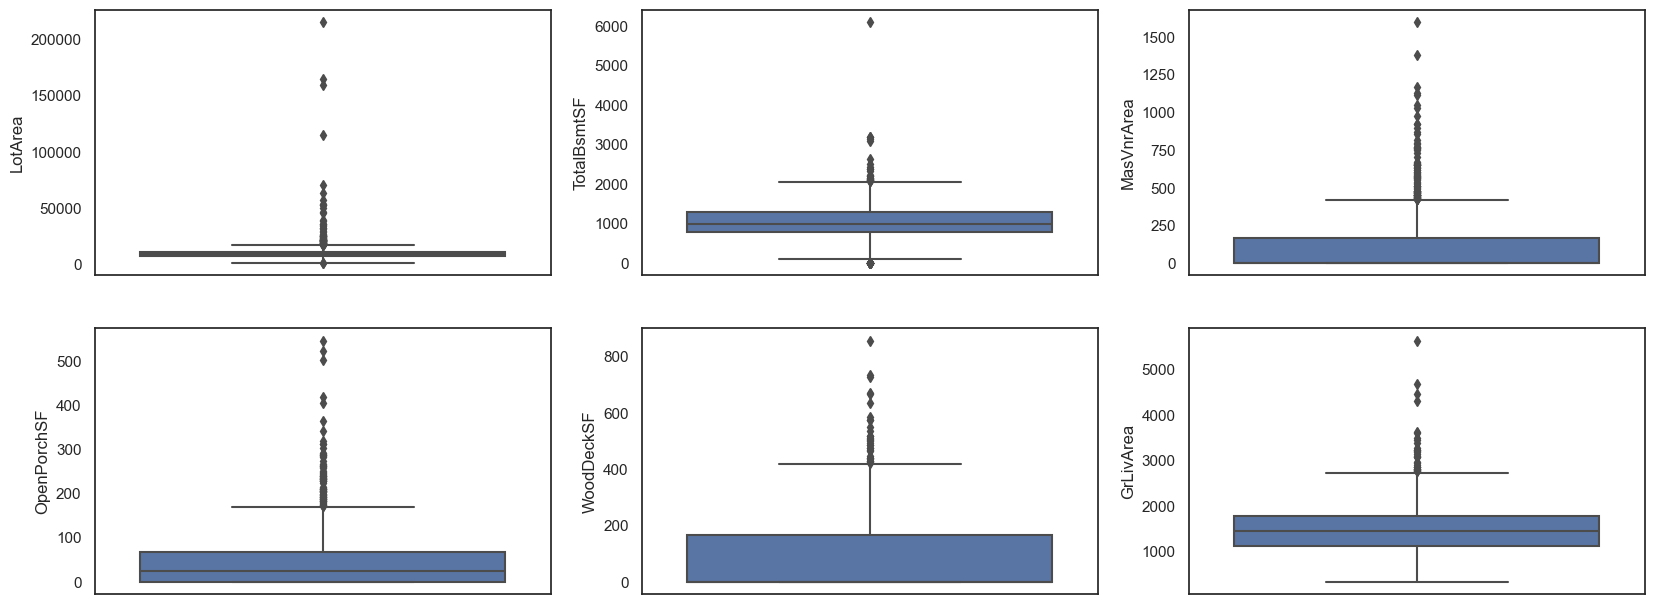

In [127]:
# Check the outliers in all the numeric columns (boxplot)

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color='b', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', color='b', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', color='b', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF', color='b', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', color='b', data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', color='b', data = df)


plt.show()

In [128]:
df.shape

(1460, 44)

In [129]:
##Removing the Outliers
# Removing values beyond 98% for LotArea

q_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < q_LotArea]


# Removing values beyond 99% for TotalBsmtSF
q_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < q_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

q_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < q_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

q_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < q_OpenPorchSF]

In [130]:
# Determine the percentage of data retained

retained_data = round(100*(len(df)/total_records),2)
print(retained_data,"%")

94.93 %


C:\Users\gouse\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 176342.76 and sigma = 71616.92



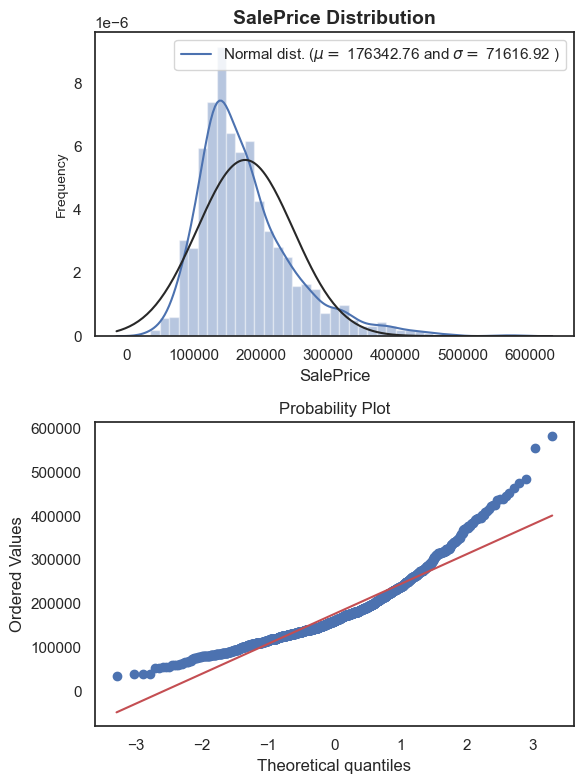

In [131]:
##Visualising the target variable 'SalePrice'
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title('SalePrice Distribution', fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(df['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

C:\Users\gouse\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.01 and sigma = 0.38



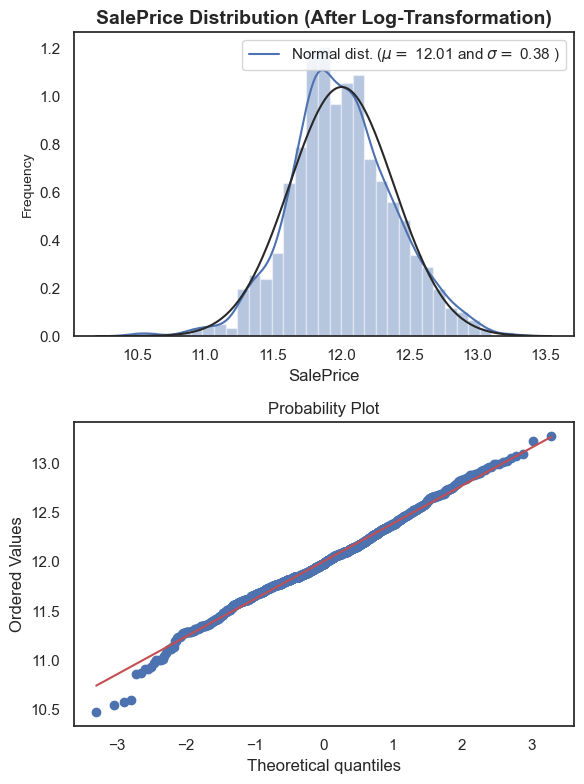

In [132]:
##Tranforming the target variable 'SalePrice' using Log-Transform. 

from scipy import stats
from scipy.stats import norm

##Using the numpy fuction log1p which that applies log(1+x) to all elements of the target variable column
df["SalePrice"] = np.log1p(df["SalePrice"])

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title("SalePrice Distribution (After Log-Transformation)", fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(df['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

In [133]:
##Let's define a function to draw scatterplots to understand relationship between 'dependent' and 'numeric' variables.
#(For three scatterplots together)
def scatter_plt_3(a, b, c):
    plt.figure(figsize=(15,5), dpi=150)
    sns.set_style("white")
    #subplot (131)
    plt.subplot(1,3,1)
    plt.scatter(x= df[a], y= df['SalePrice'])
    plt.title(("Sale price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (132)
    plt.subplot(1,3,2)
    plt.scatter(x= df[b], y= df['SalePrice'])
    plt.title(("Sale price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (133)
    plt.subplot(1,3,3)
    plt.scatter(x= df[c], y= df['SalePrice'])
    plt.title(("Sale price vs "+c), fontweight='bold', fontsize=15)
    plt.xlabel(c, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()
    
##(For two scatterplots together)
def scatter_plt_2(a,b):
    sns.set_style("white")
    plt.figure(figsize=(10,5), dpi=150)
    #subplot(121)
    plt.subplot(121)
    plt.scatter(x= df[a], y= df['SalePrice'])
    plt.title(("Sale Price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot(122)
    plt.subplot(122)
    plt.scatter(x= df[b], y= df['SalePrice'])
    plt.title(("Sale price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

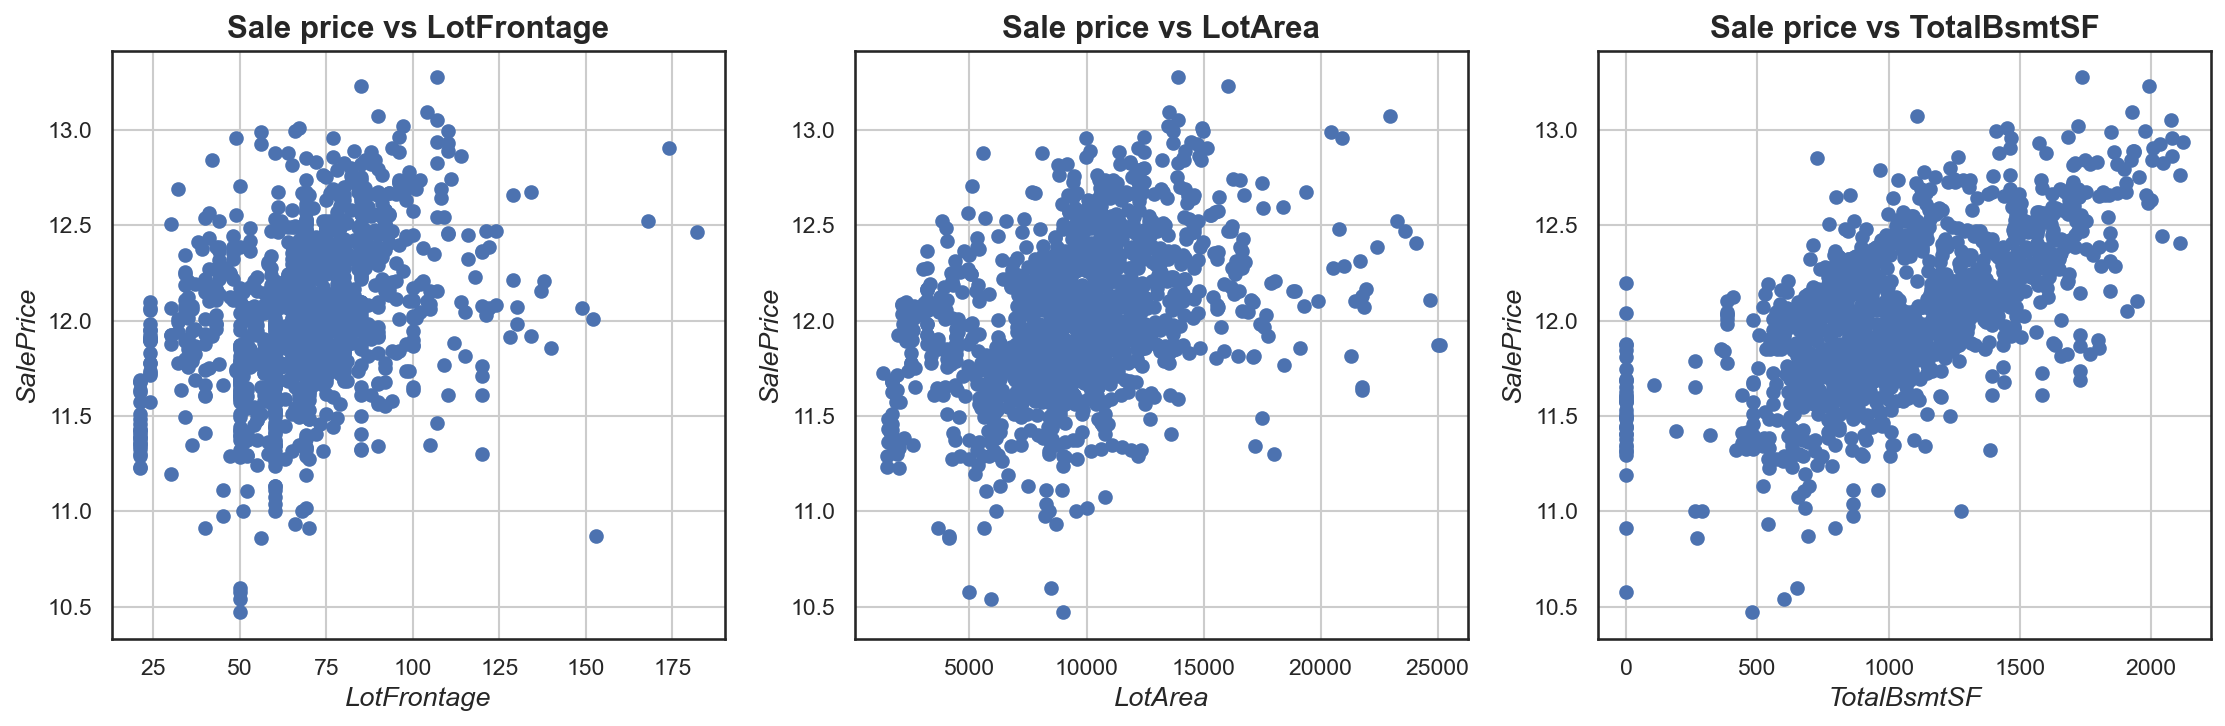

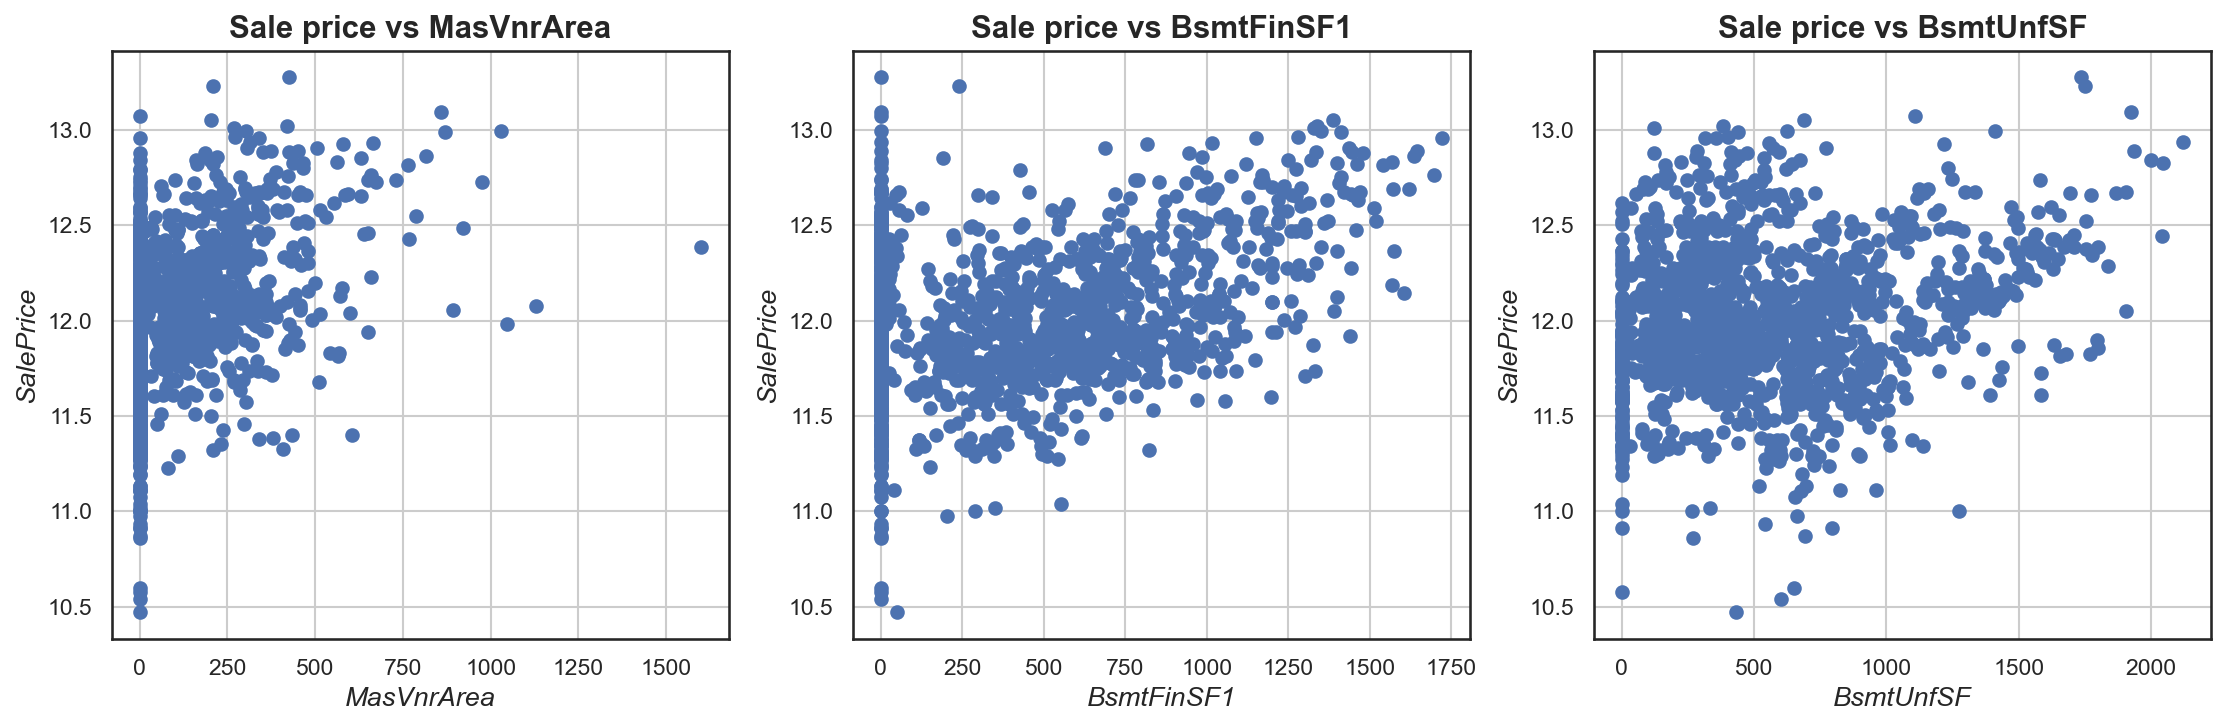

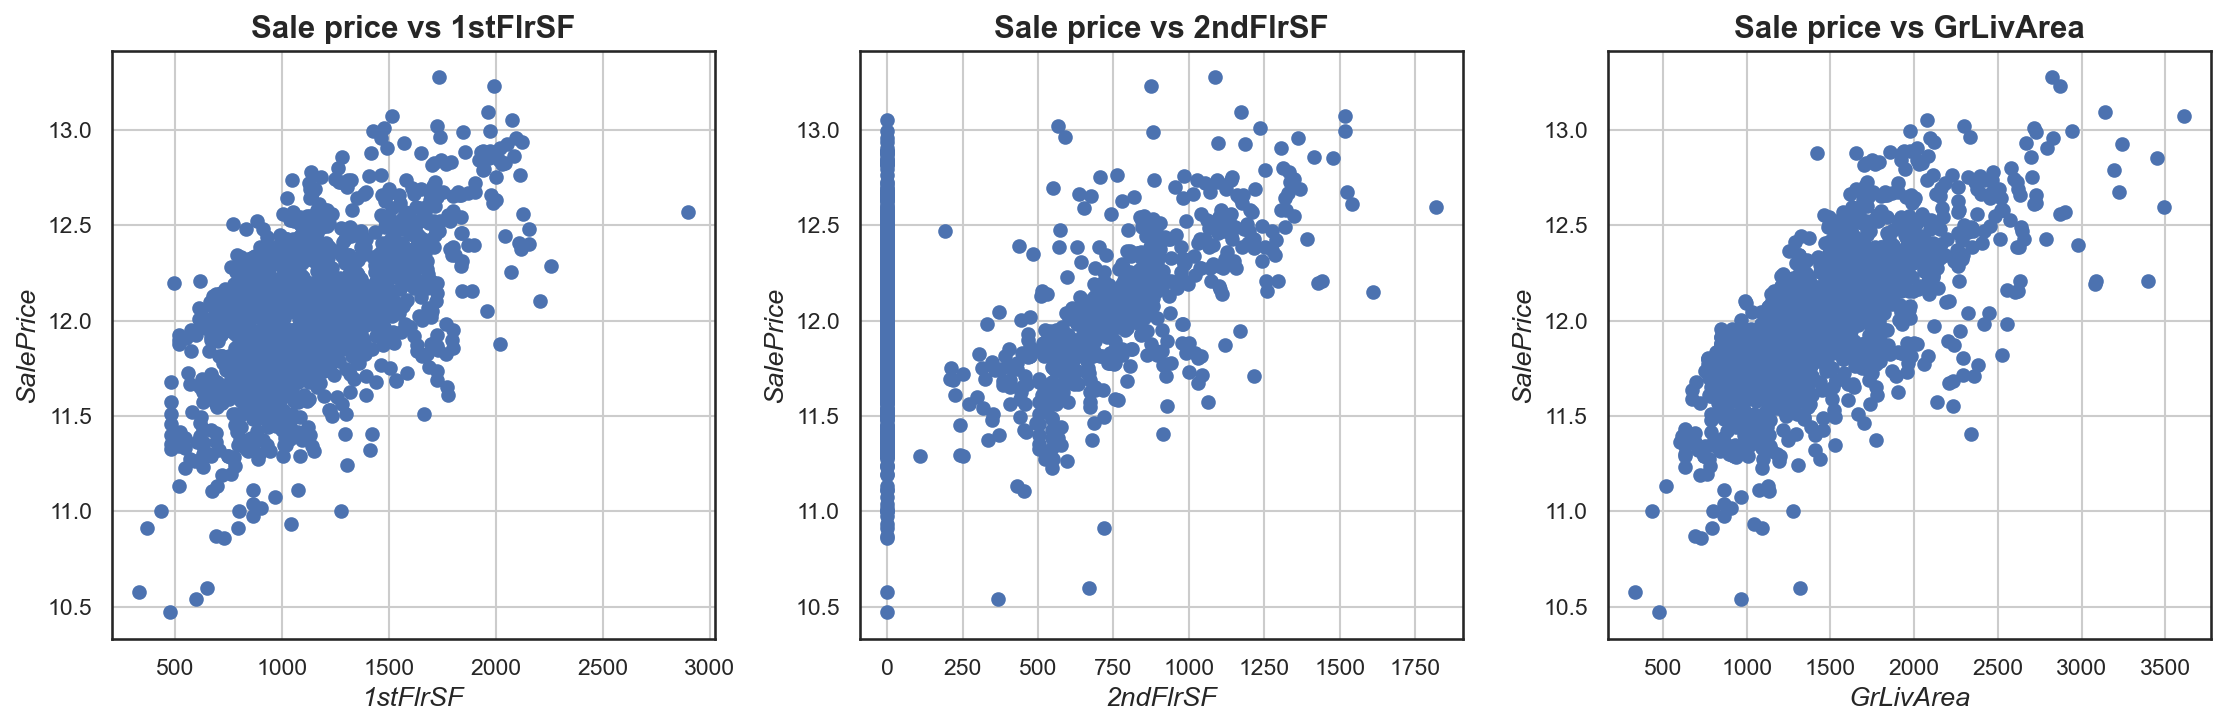

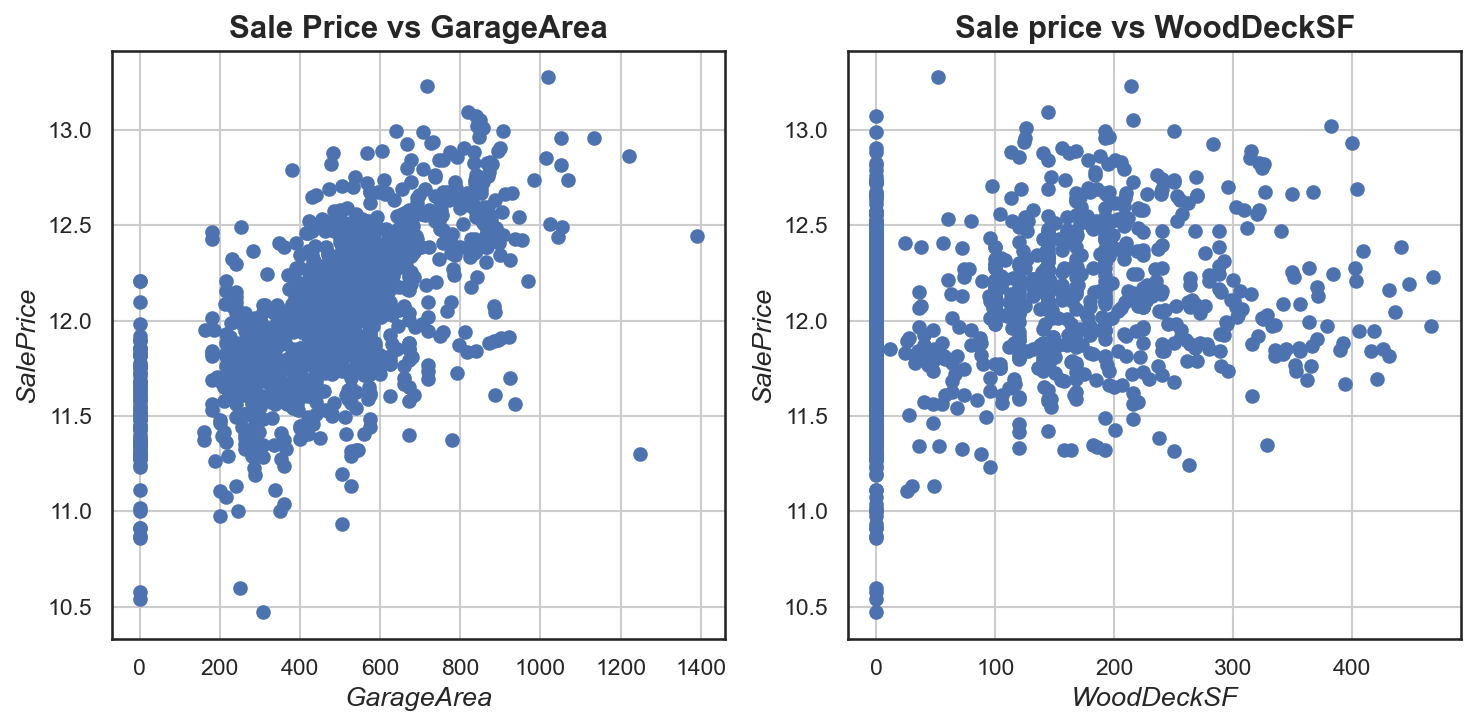

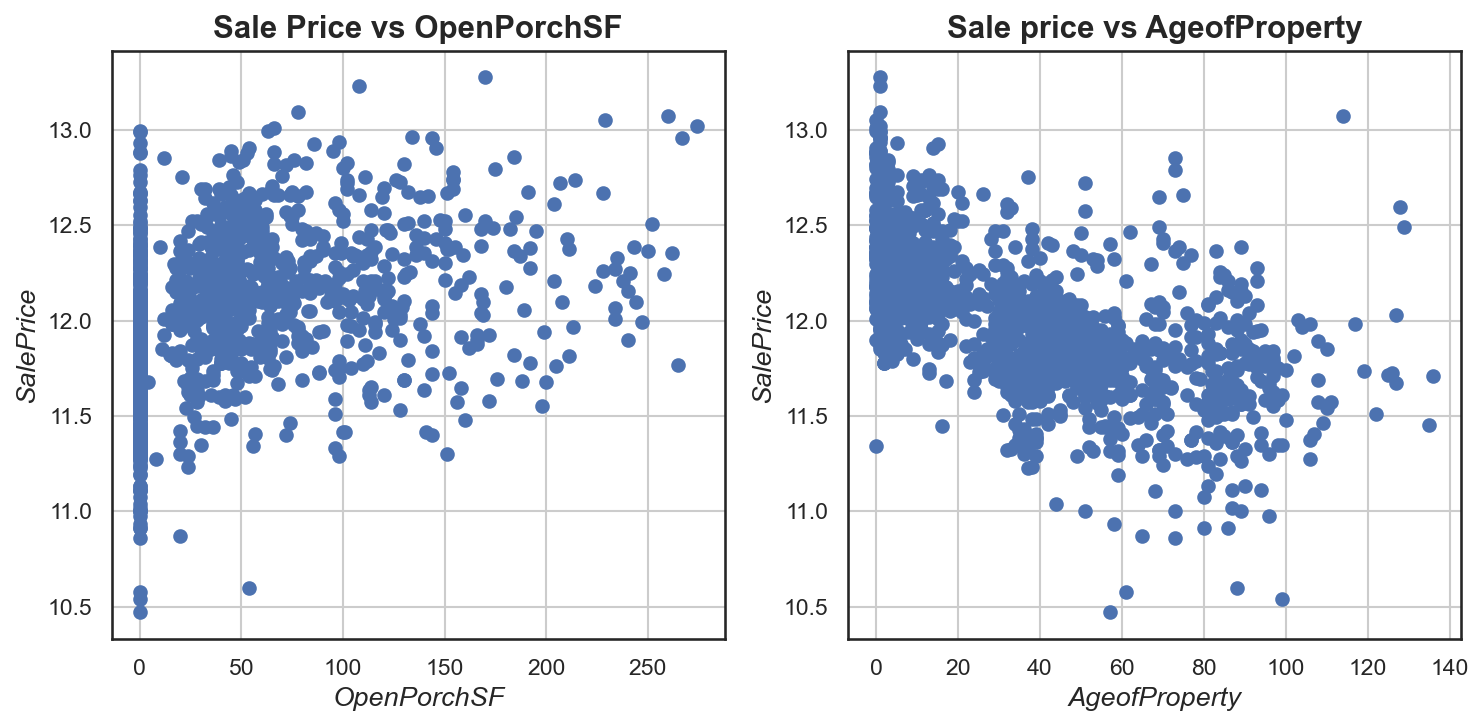

In [134]:
scatter_plt_3('LotFrontage', 'LotArea','TotalBsmtSF')
scatter_plt_3('MasVnrArea','BsmtFinSF1', 'BsmtUnfSF')
scatter_plt_3('1stFlrSF','2ndFlrSF', 'GrLivArea')
scatter_plt_2( 'GarageArea', 'WoodDeckSF')
scatter_plt_2('OpenPorchSF', 'AgeofProperty')

In [135]:
##Based on the 'LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' scatterplots w.r.t. SalePrice, eliminating some outlier datapoints 

df = df.loc[~((df['SalePrice']<11.0) & (df['LotFrontage']>150))]
df = df.loc[~((df['SalePrice']>12.0) & (df['MasVnrArea']>1500))]
df = df.loc[~((df['SalePrice']>12.0) & (df['1stFlrSF']>2500))]
df = df.loc[~((df['SalePrice']<12.5) & (df['GarageArea']>1200))]

In [136]:
## Determine the percentage of data retained in the dataset

new_retained_data = round(100*(len(df)/total_records),2)
print(new_retained_data,"%")

94.59 %


C:\Users\gouse\AppData\Local\Temp\ipykernel_21240\3374869988.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))


<Figure size 1440x1200 with 0 Axes>

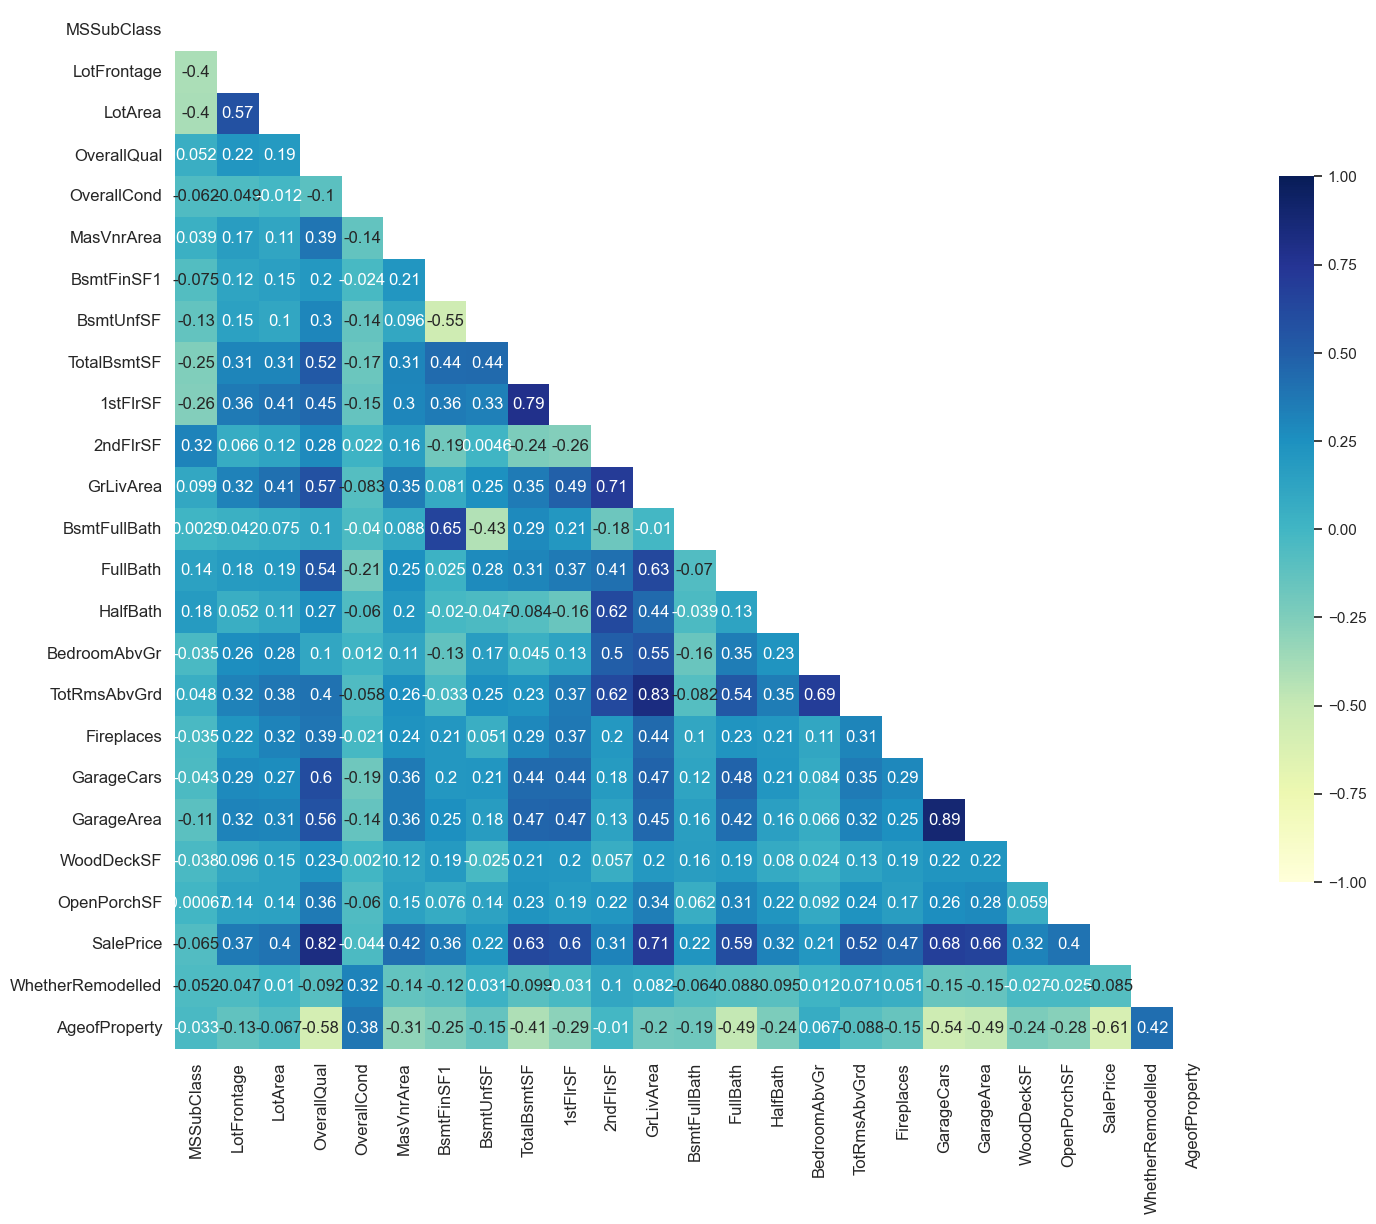

In [137]:
#Plotting a heatmap to understand correlation amongst numeric variables (ignore the categorical numeric ones)
numeric_vars= df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = df[numeric_vars].corr()
my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_1, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

In [138]:
##Removing the highly correlated predictors to reduce multicollinearity.

df= df.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond  ... Fireplaces FireplaceQu GarageType  \
0     2Story            7            5  ...          0        None     Attchd   
1     1Story            6            8  ...          1          TA     Attchd   
2     2Story            7            5  ...          1          TA     Attchd   
3     2Story            7            5  ...          1          Gd     Detchd   
4     2Story            8            5  ...          1          TA     Attchd   

  GarageFinish  GarageArea WoodDeckSF OpenPorchSF  SalePrice  \
0          RFn         548          0          61  12.247699   
1          RFn         460        298           0  12.109016   
2          RFn         608          0          42  12.317171   
3          Unf         642          0          35  11.849405   
4          RFn         836        192          84  12.429220   

  WhetherRemodelled AgeofProperty  
0                 0             5  
1                 0            31  
2                 1             7  
3                 1            91  
4                 0             8  

[5 rows x 40 columns]

C:\Users\gouse\AppData\Local\Temp\ipykernel_21240\797169919.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_mask_2 = np.triu(np.ones_like(corr_matrix_new1, dtype=np.bool))


<Figure size 1440x1200 with 0 Axes>

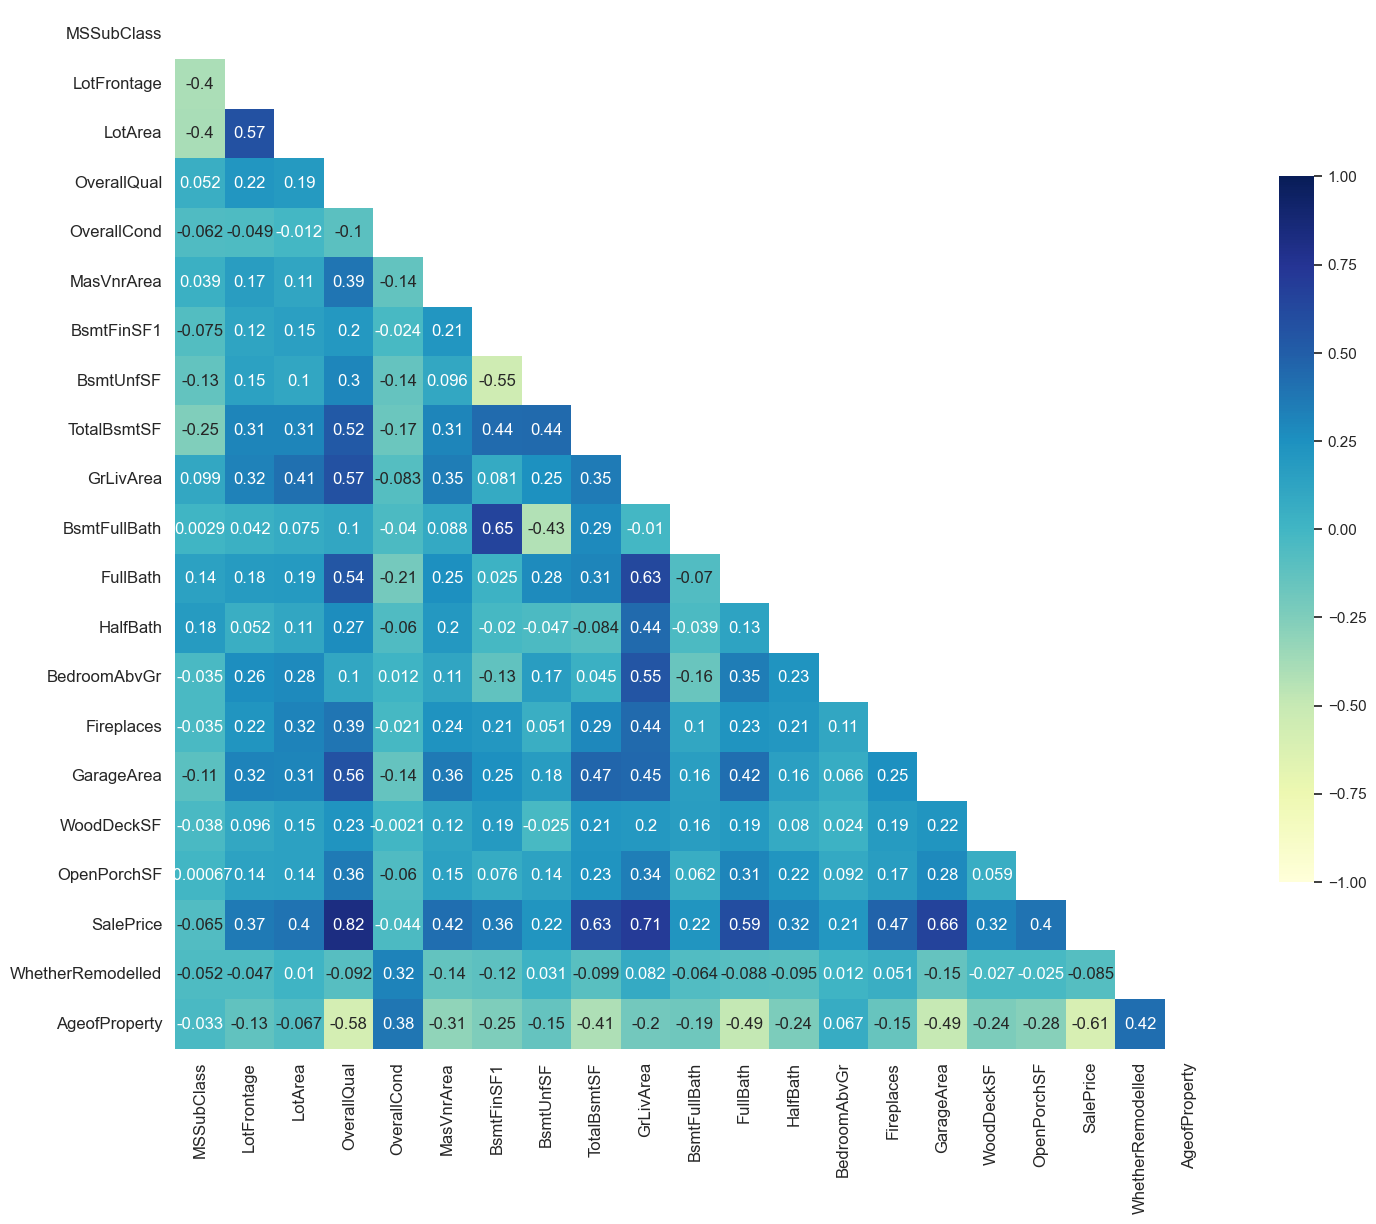

In [139]:
#Rechecking the heatmap to understand correlation amongst all numeric variables (ignore the categorical numeric ones)
numeric_vars1= df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new1 = df[numeric_vars1].corr()
my_mask_2 = np.triu(np.ones_like(corr_matrix_new1, dtype=np.bool))
f, ax_corr2 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr2 = sns.heatmap(corr_matrix_new1, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_2, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.autoscale()
plt.show()

In [140]:
#Housing Dataframe Shape Check
df.shape

(1381, 40)

In [141]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

##For ordinals, let's assign them their respective weights.
df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotConfig Neighborhood  \
0          60       RL         65.0     8450    Inside      CollgCr   
1          20       RL         80.0     9600       FR2      Veenker   
2          60       RL         68.0    11250    Inside      CollgCr   
3          70       RL         60.0     9550    Corner      Crawfor   
4          60       RL         84.0    14260       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle  ... AgeofProperty  \
0     2Story            7            5     Gable  ...             5   
1     1Story            6            8     Gable  ...            31   
2     2Story            7            5     Gable  ...             7   
3     2Story            7            5     Gable  ...            91   
4     2Story            8            5     Gable  ...             8   

  d_LotShape d_ExterQual  d_BsmtQual d_BsmtExposure  d_BsmtFinType1  \
0          3           4           4              1               6   
1          3           3           4              4               5   
2          2           4           4              2               6   
3          2           3           3              1               5   
4          2           4           4              3               6   

   d_HeatingQC  d_KitchenQual  d_FireplaceQu  d_GarageFinish  
0            5              4              0               2  
1            5              3              3               2  
2            5              4              3               2  
3            4              4              4               1  
4            5              4              3               2  

[5 rows x 40 columns]

In [142]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass', drop_first = True)
df = pd.concat([df, d_MSSubClass], axis = 1)

##Creating dummies for 'LotConfigs'
d_LotConfigs = pd.get_dummies(df['LotConfig'], prefix='LotConfig', drop_first = True)
df = pd.concat([df, d_LotConfigs], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

##Creating dummies for 'HouseStyle'
d_HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', drop_first = True)
df = pd.concat([df, d_HouseStyle], axis = 1)

##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

##Creating dummies for 'MasVnrType'
d_MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
df = pd.concat([df, d_MasVnrType], axis = 1)

##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)


##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', \
              'GarageType',  'LotConfig' ,'HouseStyle', 'MasVnrType']
df = df.drop(orig_before_dum_cols, axis=1)

In [143]:
##Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

df_corr = df.drop(['SalePrice'],axis =1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
col_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

C:\Users\gouse\AppData\Local\Temp\ipykernel_21240\1759640386.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))


['d_ExterQual',
 'd_BsmtFinType1',
 'd_KitchenQual',
 'd_FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Foundation_PConc',
 'MasVnrTyp_None',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_Detchd']

In [144]:
##Dropping independent predictors highly correlated to each other
df = df.drop(col_to_drop, axis=1)

In [145]:
#Recheck Model 
df.shape

(1381, 108)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 0 to 1458
Columns: 108 entries, LotFrontage to GarageType_None
dtypes: float64(3), int64(22), uint8(83)
memory usage: 392.5 KB


In [147]:
##Creating a copy of this dataframe for 'Question 3'
df_new1 = df.copy()

In [148]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)
print(binary_cols)

['WhetherRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Ext

In [149]:
##split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [150]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [151]:
print(df_train.shape)
print(df_test.shape)

(966, 108)
(415, 108)


In [152]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [153]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

In [160]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [161]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('LotFrontage', False, 5),
 ('LotArea', False, 8),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 46),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 38),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 20),
 ('FullBath', False, 37),
 ('HalfBath', False, 33),
 ('BedroomAbvGr', False, 41),
 ('Fireplaces', False, 24),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 21),
 ('OpenPorchSF', False, 45),
 ('AgeofProperty', True, 1),
 ('d_LotShape', False, 48),
 ('d_BsmtQual', False, 15),
 ('d_BsmtExposure', False, 28),
 ('d_HeatingQC', False, 25),
 ('d_GarageFinish', False, 50),
 ('WhetherRemodelled', False, 49),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 44),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 27),
 ('MSSubClass_60', False, 51),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 31),
 ('MSSubClass_85', False, 35),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False

In [162]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'AgeofProperty', 'MSSubClass_30', 'MSSubClass_45',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160',
       'LotConfig_CulDSac', 'MSZoning_FV', 'MSZoning_RL',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'HouseStyle_2.5Fin

In [163]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)
top50_df

Features  rfe_support  rfe_ranking
0            OverallQual         True            1
1            OverallCond         True            1
2             BsmtFinSF1         True            1
3            TotalBsmtSF         True            1
4              GrLivArea         True            1
5             GarageArea         True            1
6          AgeofProperty         True            1
7          MSSubClass_30         True            1
8          MSSubClass_45         True            1
9          MSSubClass_70         True            1
10         MSSubClass_75         True            1
11         MSSubClass_90         True            1
12        MSSubClass_160         True            1
13     LotConfig_CulDSac         True            1
14           MSZoning_FV         True            1
15           MSZoning_RL         True            1
16   Neighborhood_BrDale         True            1
17  Neighborhood_CollgCr         True            1
18  Neighborhood_Crawfor         True            1
19  Neighborhood_Edwards         True            1
20   Neighborhood_IDOTRR         True            1
21  Neighborhood_MeadowV         True            1
22  Neighborhood_Mitchel         True            1
23    Neighborhood_NAmes         True            1
24  Neighborhood_NPkVill         True            1
25   Neighborhood_NWAmes         True            1
26  Neighborhood_NridgHt         True            1
27  Neighborhood_OldTown         True            1
28   Neighborhood_Sawyer         True            1
29  Neighborhood_SawyerW         True            1
30  Neighborhood_StoneBr         True            1
31   Exterior2nd_AsphShn         True            1
32   Exterior2nd_Brk Cmn         True            1
33   Exterior2nd_BrkFace         True            1
34   Exterior2nd_CmentBd         True            1
35   Exterior2nd_HdBoard         True            1
36   Exterior2nd_ImStucc         True            1
37   Exterior2nd_MetalSd         True            1
38   Exterior2nd_Plywood         True            1
39     Exterior2nd_Stone         True            1
40    Exterior2nd_Stucco         True            1
41   Exterior2nd_VinylSd         True            1
42   Exterior2nd_Wd Sdng         True            1
43     HouseStyle_2.5Fin         True            1
44     HouseStyle_2.5Unf         True            1
45      Foundation_Stone         True            1
46       Foundation_Wood         True            1
47     RoofStyle_Gambrel         True            1
48   Exterior1st_BrkComm         True            1
49   Exterior1st_BrkFace         True            1
50   Exterior1st_WdShing         True            1
51    GarageType_Basment         True            1
52       GarageType_None         True            1

In [164]:
##Let's Assign top 50 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]

In [165]:
##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [166]:
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [167]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
19         8.0         -0.208529        -0.220408                1
18         7.0         -0.208129        -0.220416                2
20         9.0         -0.208953        -0.220435                3
21        10.0         -0.209385        -0.220491                4
17         6.0         -0.207756        -0.220528                5
22          11         -0.209821        -0.220590                6
16         5.0         -0.207400        -0.220727                7
23          12         -0.210262        -0.220733                8
24          13         -0.210707        -0.220914                9
15         4.0         -0.207087        -0.221013               10
25          14         -0.211154        -0.221153               11
14         3.0         -0.206790        -0.221372               12
26          15         -0.211595        -0.221411               13
27          16         -0.212032        -0.221677               14
28          17         -0.212474        -0.221960               15
13         2.0         -0.206460        -0.222047               16
29          18         -0.212911        -0.222241               17
30          19         -0.213338        -0.222520               18
31          20         -0.213753        -0.222791               19
12         1.0         -0.206002        -0.223012               20
11         0.9         -0.205936        -0.223162               21
10         0.8         -0.205866        -0.223317               22
9          0.7         -0.205790        -0.223483               23
8          0.6         -0.205704        -0.223659               24
7          0.5         -0.205612        -0.223859               25
6          0.4         -0.205514        -0.224101               26
5          0.3         -0.205404        -0.224357               27
4          0.2         -0.205259        -0.224698               28
3          0.1         -0.205083        -0.225060               29
2         0.01         -0.204953        -0.225611               30
1        0.001         -0.204939        -0.225679               31
0       0.0001         -0.204938        -0.225686               32
32          50         -0.222545        -0.229598               33
33         100         -0.230474        -0.236135               34
34         500         -0.274133        -0.276458               35
35        1000         -0.331197        -0.332998               36

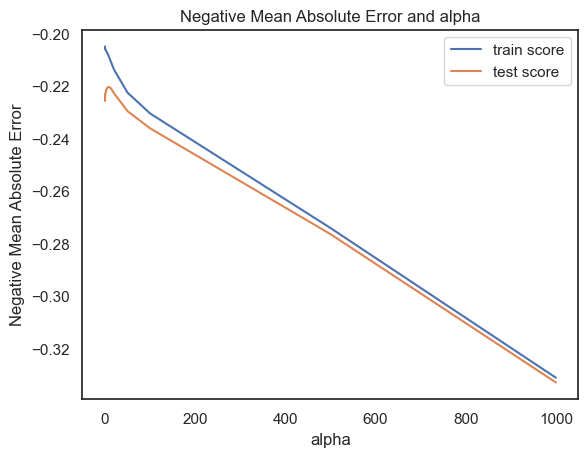

In [168]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [169]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

Ridge(alpha=8.0)

In [170]:
##Checking the coefficient values with lambda (alpha) = 8

ridge = Ridge(alpha=8)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.12676632079141487
Coefficients:
 [ 0.22694115  0.15681324  0.10804413  0.14386366  0.35809175  0.10522317
 -0.2888177  -0.05069354  0.04071949  0.17096908  0.01633184 -0.16437911
 -0.24145748  0.09032678  0.23696536  0.17888174 -0.09694056 -0.06026039
  0.1720292  -0.07726009 -0.14062481 -0.17343537 -0.14809166 -0.11640526
 -0.00139732 -0.11014183  0.12498421 -0.11688793 -0.10635791 -0.06378305
  0.15562891  0.02901125 -0.07760901  0.08208687  0.04305968 -0.0156782
 -0.02331114  0.04260749 -0.00081138  0.08823981  0.07718563  0.05915921
  0.07599832 -0.04993932 -0.04369158  0.07309408 -0.08895885  0.07281333
 -0.1356508   0.13719108  0.04590108 -0.08516036 -0.11267395]


In [171]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=8.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=8.0):
 ****************************************

For Train Set:
R2 score: 0.9147660904239067 
MSE score: 0.08523390957609332 
MAE score: 0.208868147202651 
RMSE score: 0.29194847075484626

For Test Set:
R2 score: 0.8914992116235863 
MSE score: 0.10518436696570772 
MAE score: 0.21521410472955435 
RMSE score: 0.32432139455439524 
 ****************************************


In [172]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0             GrLivArea       0.3581                            0.3581
1         AgeofProperty      -0.2888                            0.2888
2        MSSubClass_160      -0.2415                            0.2415
3           MSZoning_FV       0.2370                            0.2370
4           OverallQual       0.2269                            0.2269
5           MSZoning_RL       0.1789                            0.1789
6  Neighborhood_MeadowV      -0.1734                            0.1734
7  Neighborhood_Crawfor       0.1720                            0.1720
8         MSSubClass_70       0.1710                            0.1710
9         MSSubClass_90      -0.1644                            0.1644

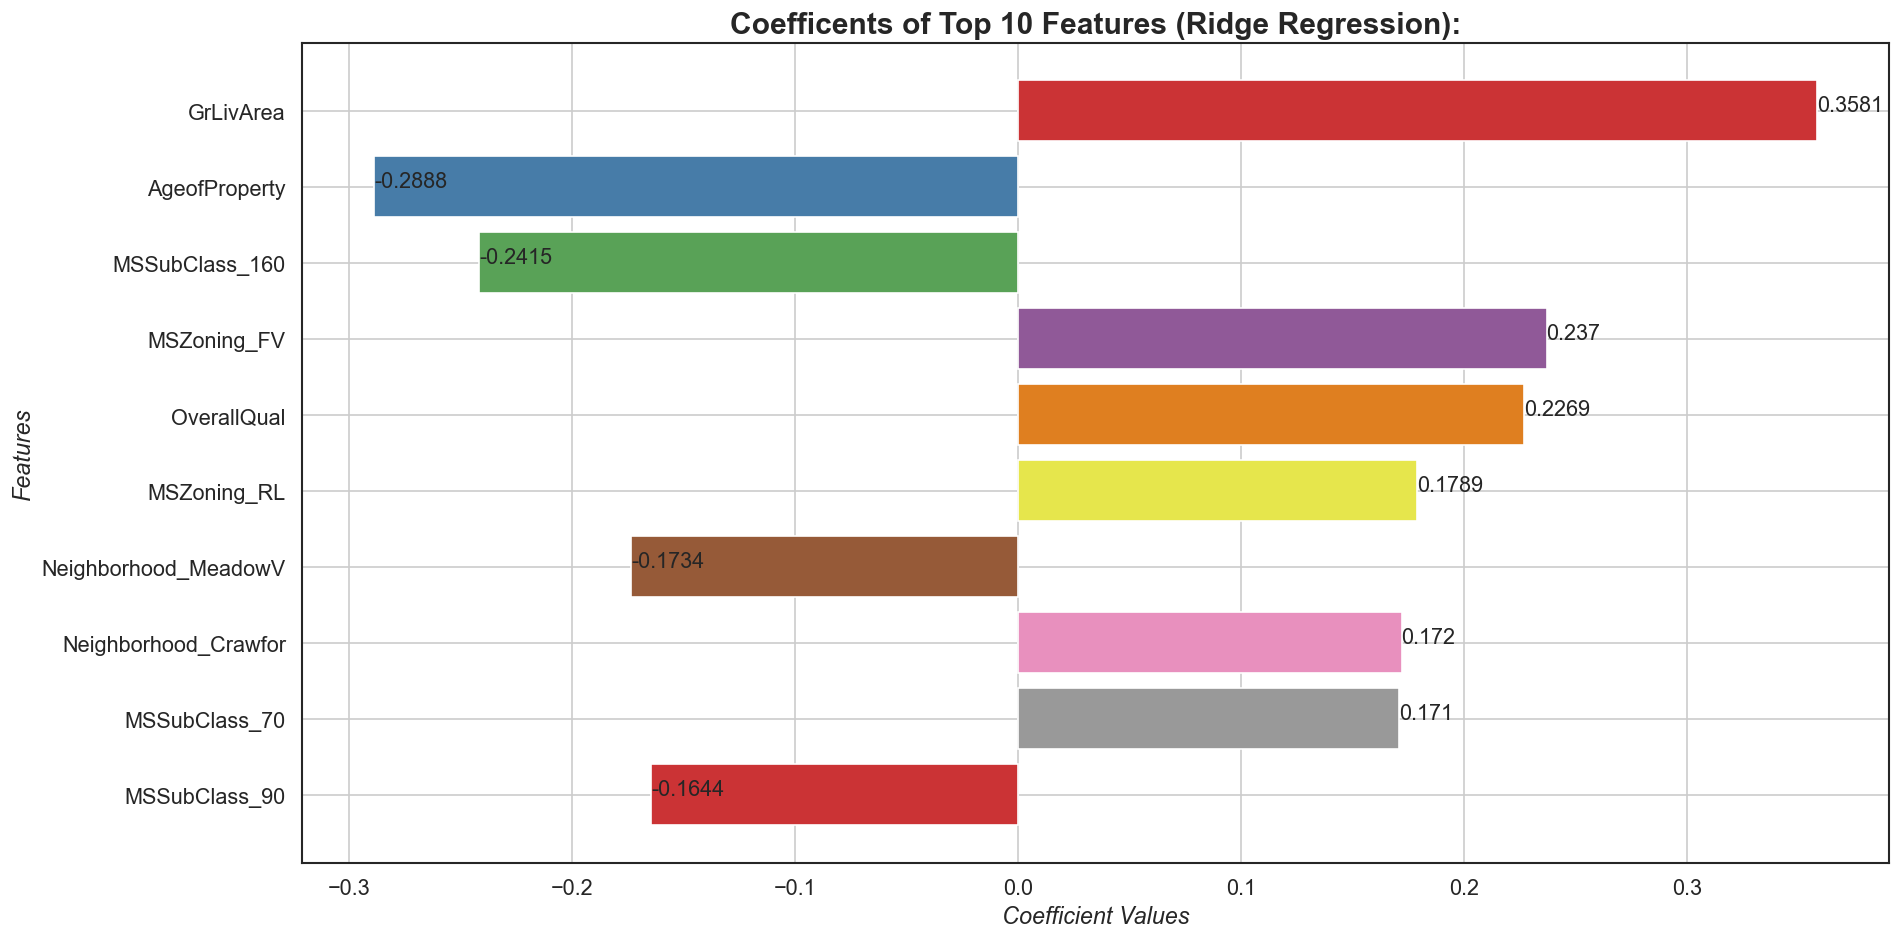

In [173]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


C:\Users\gouse\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


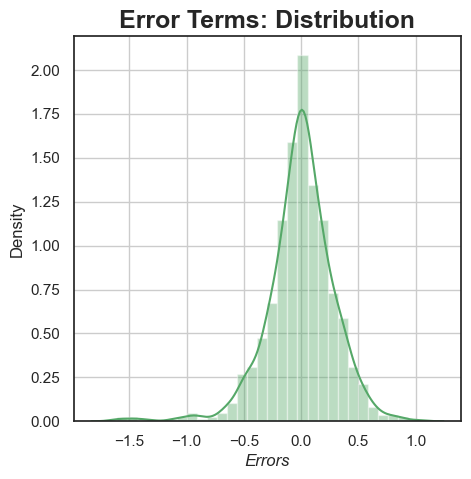

In [174]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

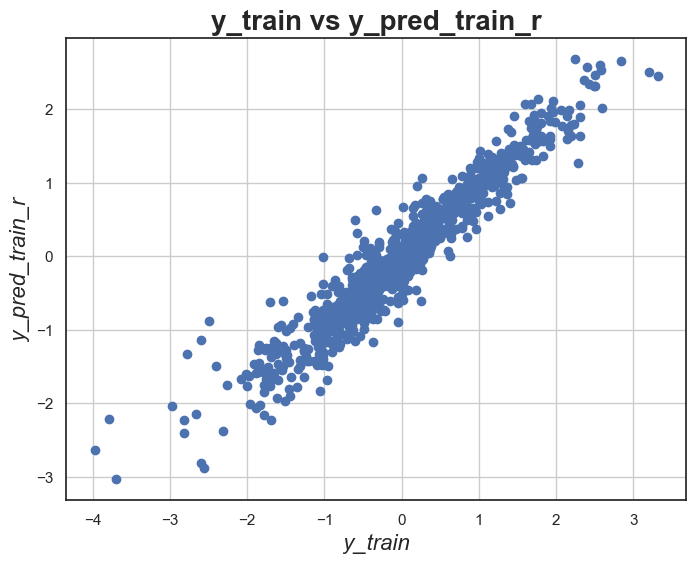

In [175]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [176]:
y_train.shape

(966,)

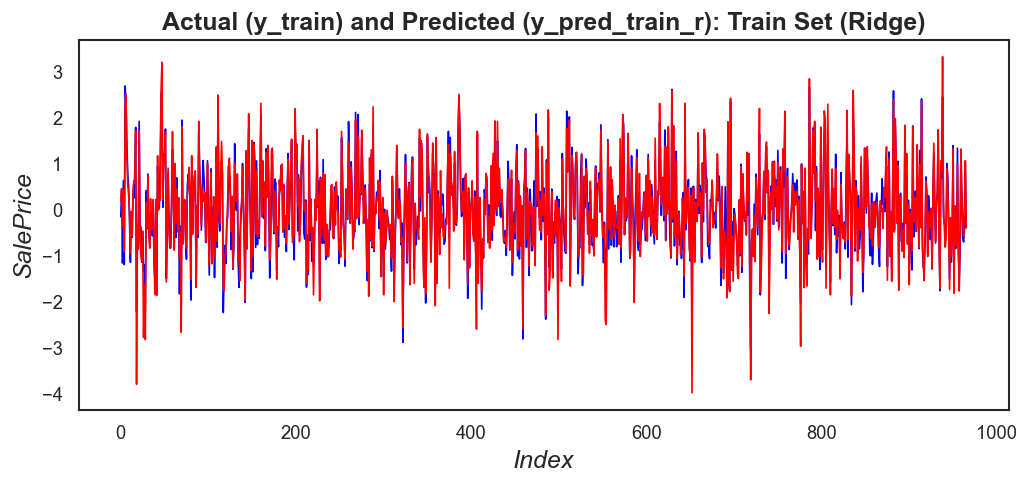

In [177]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f = [i for i in range(0,966,1)] #Since y_train has 966 observations
g = [i for i in range(0,966,1)]
plt.plot(f, y_pred_train_r, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_r' plot
plt.plot(g, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_r): Train Set (Ridge)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

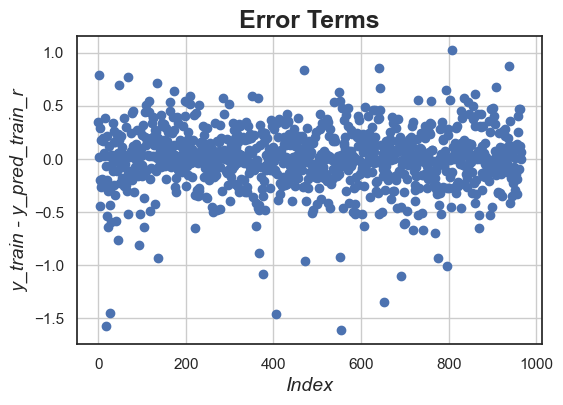

In [178]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,966,1)] #For 966 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j, res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

C:\Users\gouse\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


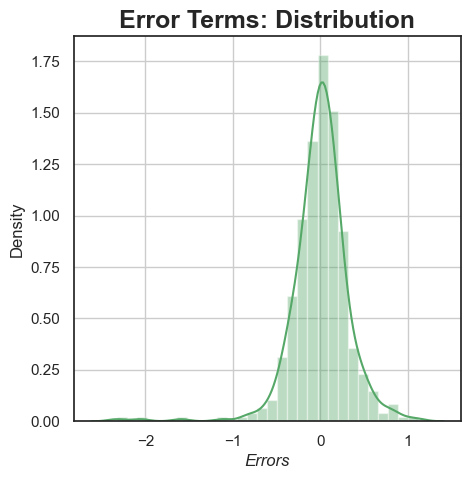

In [179]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

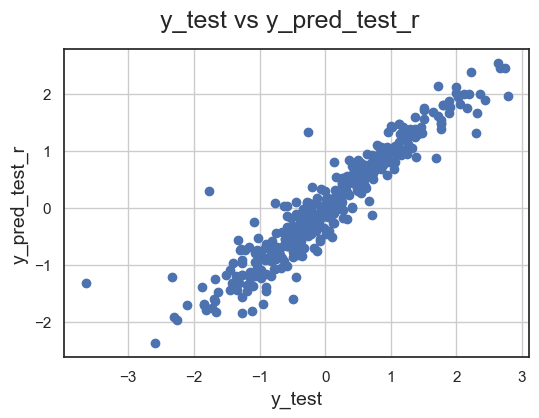

In [180]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

In [181]:
y_test.shape

(415,)

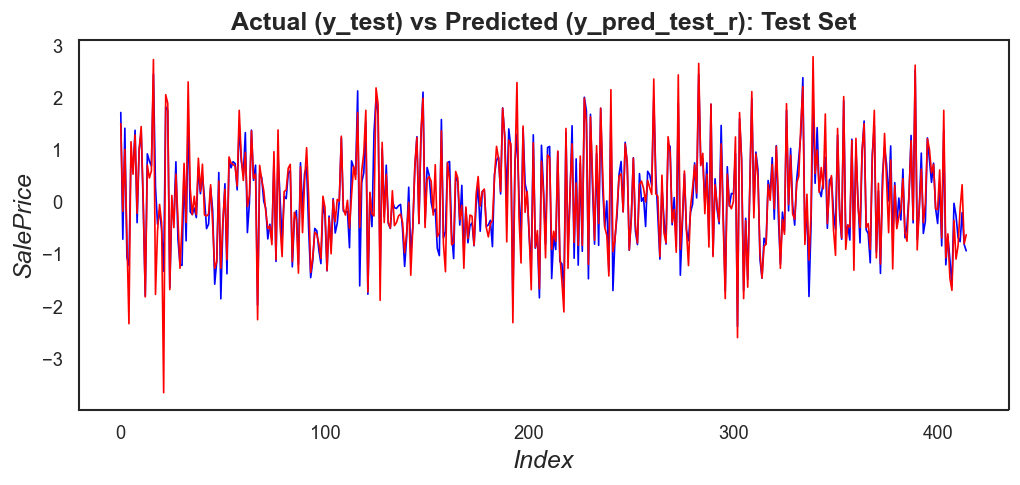

In [182]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p = [i for i in range(0,415,1)] #As test set has 415 observations
l = [i for i in range(0,415,1)]
plt.plot(p, y_pred_test_r, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_r' plot(test pred)
plt.plot(l, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_r): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

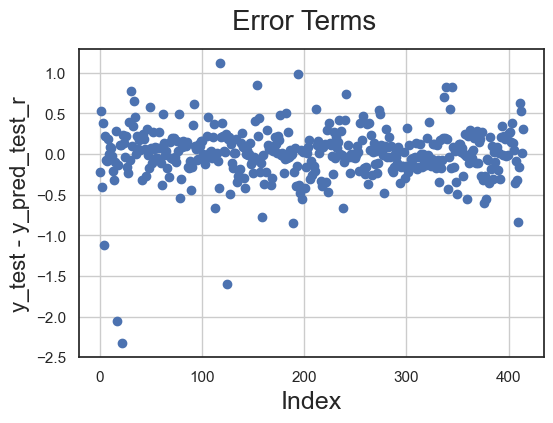

In [183]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,415,1)] #For 415 observations in the test set
res_test = (y_test-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

In [184]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [185]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
8       0.0009         -0.208651        -0.223345                1
9        0.001         -0.209068        -0.223360                2
7       0.0008         -0.208289        -0.223418                3
6       0.0007         -0.207932        -0.223468                4
5       0.0006         -0.207583        -0.223488                5
4       0.0005         -0.207254        -0.223690                6
3       0.0003         -0.206574        -0.224018                7
10       0.002         -0.213051        -0.224333                8
2       0.0002         -0.205956        -0.224427                9
1       0.0001         -0.205262        -0.225160               10
0      0.00001         -0.204957        -0.225601               11
11       0.003         -0.217517        -0.226759               12
12       0.004         -0.221471        -0.230009               13
13       0.005         -0.225425        -0.233228               14
14        0.01         -0.240006        -0.243933               15
15        0.05         -0.253709        -0.256450               16
16         0.1         -0.286503        -0.288615               17
17         0.2         -0.345715        -0.347300               18
18         0.3         -0.421508        -0.423669               19
19         0.4         -0.503736        -0.506022               20
20         0.5         -0.576048        -0.577835               21
21         0.6         -0.636055        -0.637773               22
22         0.7         -0.697506        -0.699013               23
23         0.8         -0.761580        -0.762717               24
37         100         -0.775470        -0.775675               25
36          50         -0.775470        -0.775675               25
35          20         -0.775470        -0.775675               25
34        10.0         -0.775470        -0.775675               25
33         9.0         -0.775470        -0.775675               25
32         8.0         -0.775470        -0.775675               25
31         7.0         -0.775470        -0.775675               25
29         5.0         -0.775470        -0.775675               25
38         500         -0.775470        -0.775675               25
28         4.0         -0.775470        -0.775675               25
27         3.0         -0.775470        -0.775675               25
26         2.0         -0.775470        -0.775675               25
25         1.0         -0.775470        -0.775675               25
24         0.9         -0.775470        -0.775675               25
30         6.0         -0.775470        -0.775675               25
39        1000         -0.775470        -0.775675               25

In [186]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [187]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
9       0.0009         -0.208651        -0.223345                1
10       0.001         -0.209068        -0.223360                2
8       0.0008         -0.208289        -0.223418                3
7       0.0007         -0.207932        -0.223468                4
6       0.0006         -0.207583        -0.223488                5
5       0.0005         -0.207254        -0.223690                6
4       0.0004         -0.206953        -0.223845                7
3       0.0003         -0.206574        -0.224018                8
11       0.002         -0.213051        -0.224333                9
2       0.0002         -0.205956        -0.224427               10
1       0.0001         -0.205262        -0.225160               11
0      0.00001         -0.204957        -0.225601               12
12       0.003         -0.217517        -0.226759               13
13       0.005         -0.225425        -0.233228               14
14        0.01         -0.240006        -0.243933               15
15        0.02         -0.243076        -0.245842               16
16        0.05         -0.253709        -0.256450               17

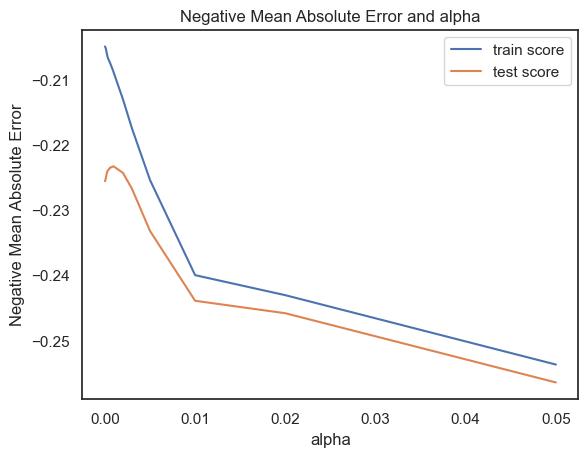

In [188]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [189]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0009)

In [190]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.11425634818966558
Coefficients:
  [ 0.22461899  0.15941314  0.10599951  0.14137919  0.36274115  0.10302816
 -0.29815376 -0.02021112  0.          0.19531839 -0.         -0.18095669
 -0.31694993  0.08605825  0.30173192  0.18411748 -0.         -0.04071048
  0.20386234 -0.04997295 -0.12524917 -0.14569427 -0.14894115 -0.09722646
 -0.         -0.10113077  0.14450568 -0.098511   -0.09059359 -0.04245212
  0.19178407  0.         -0.          0.          0.         -0.03958242
 -0.          0.01111698 -0.01733096  0.          0.01932391  0.02117088
  0.0402302  -0.         -0.          0.         -0.          0.0164796
 -0.31133421  0.16296065  0.         -0.08380846 -0.1126577 ]


In [191]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.001):
 ****************************************

For Train Set:
R2 score: 0.9142067117018274 
MSE score: 0.08579328829817259 
MAE score: 0.21050174580673572 
RMSE score: 0.2929049134073592

For Test Set:
R2 score: 0.8930510802302573 
MSE score: 0.10367993257910818 
MAE score: 0.21447909146008057 
RMSE score: 0.32199368406710743 
 ****************************************


In [192]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0             GrLivArea       0.3627                            0.3627
1        MSSubClass_160      -0.3169                            0.3169
2   Exterior1st_BrkComm      -0.3113                            0.3113
3           MSZoning_FV       0.3017                            0.3017
4         AgeofProperty      -0.2982                            0.2982
5           OverallQual       0.2246                            0.2246
6  Neighborhood_Crawfor       0.2039                            0.2039
7         MSSubClass_70       0.1953                            0.1953
8  Neighborhood_StoneBr       0.1918                            0.1918
9           MSZoning_RL       0.1841                            0.1841

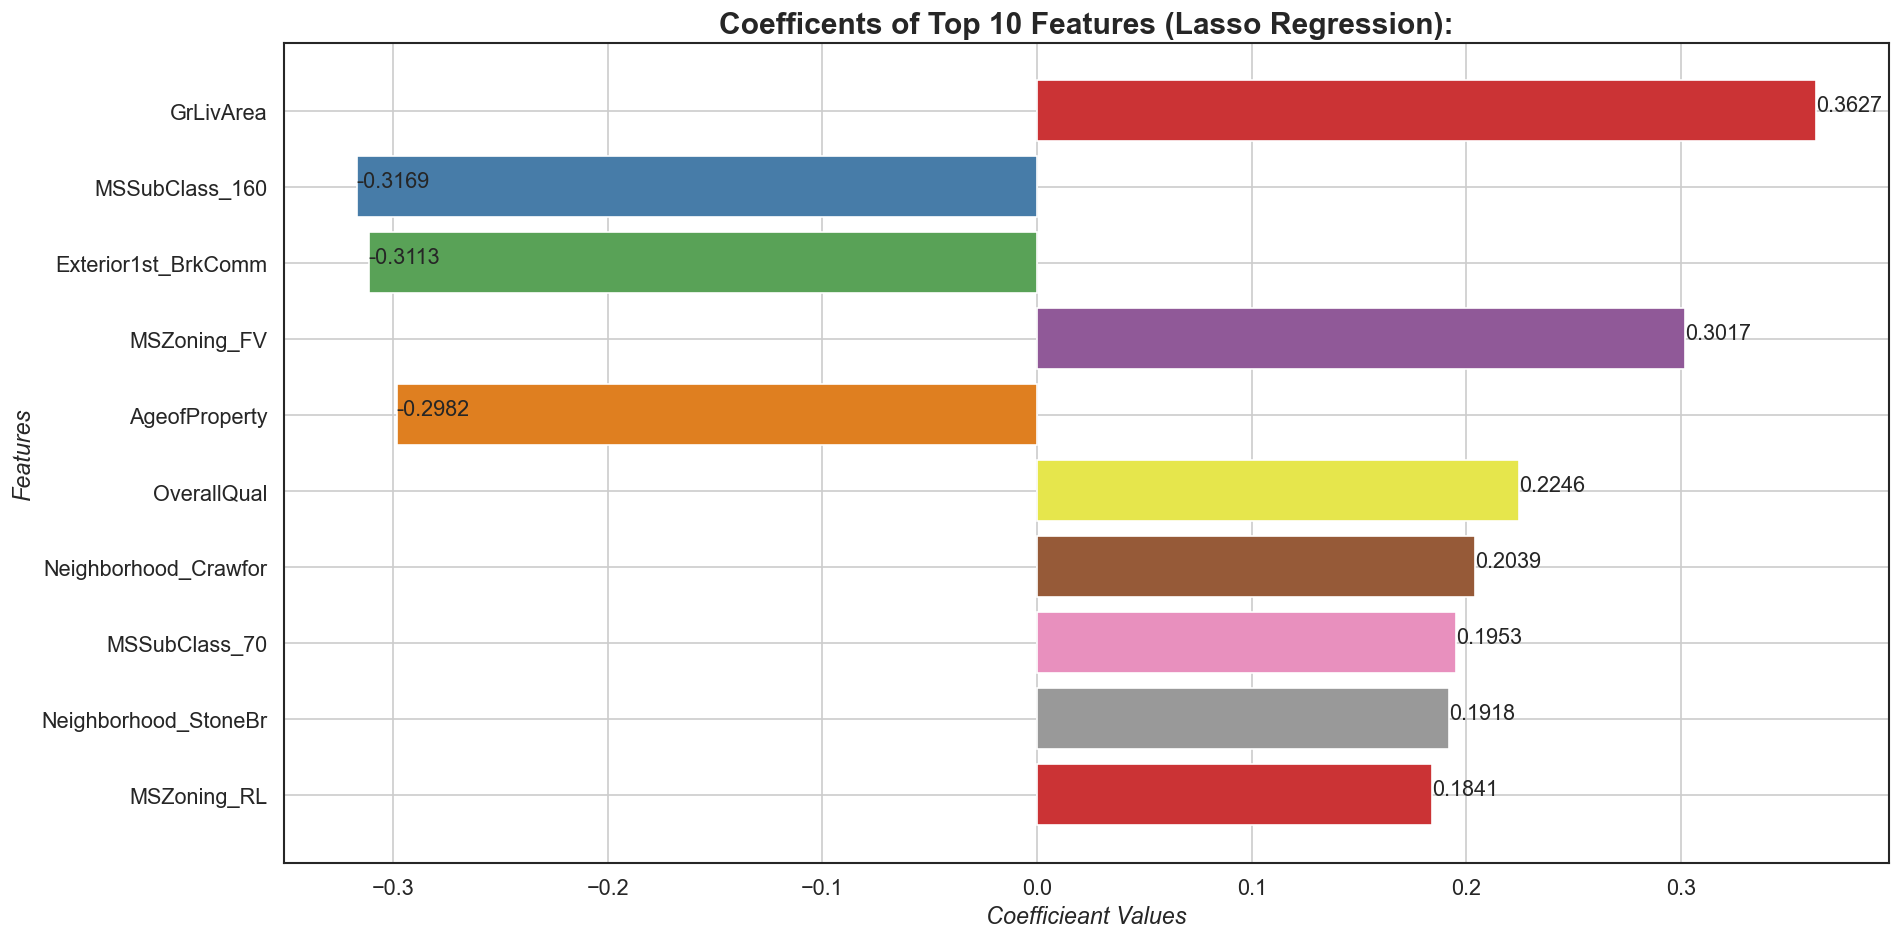

In [193]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficieant Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [194]:
##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['GrLivArea',
 'MSSubClass_160',
 'Exterior1st_BrkComm',
 'MSZoning_FV',
 'AgeofProperty']

C:\Users\gouse\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


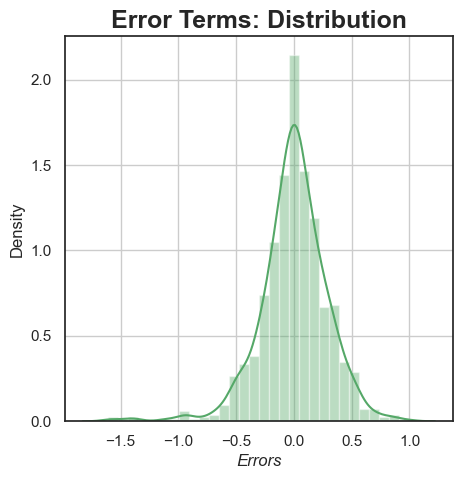

In [195]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

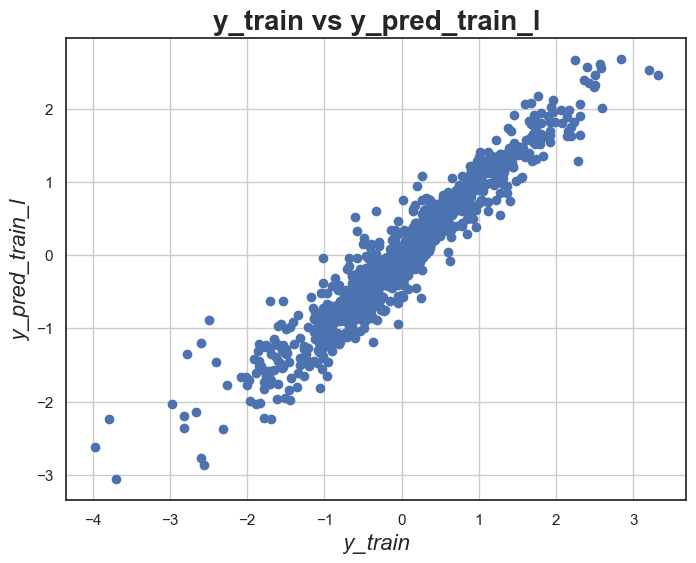

In [196]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [197]:
y_train.shape

(966,)

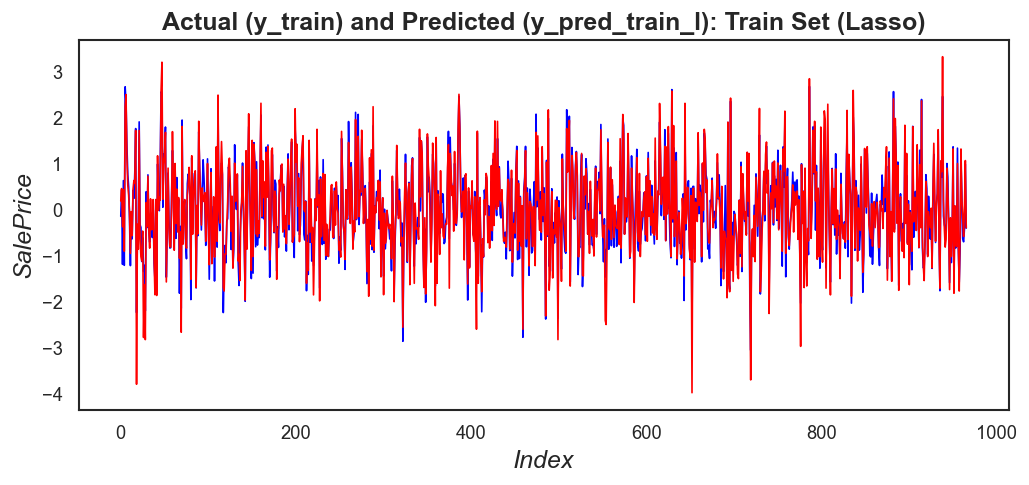

In [198]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f1 = [i for i in range(0,966,1)] #Since y_train has 966 observations
g1 = [i for i in range(0,966,1)]
plt.plot(f1, y_pred_train_l, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_l' plot
plt.plot(g1, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_l): Train Set (Lasso)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

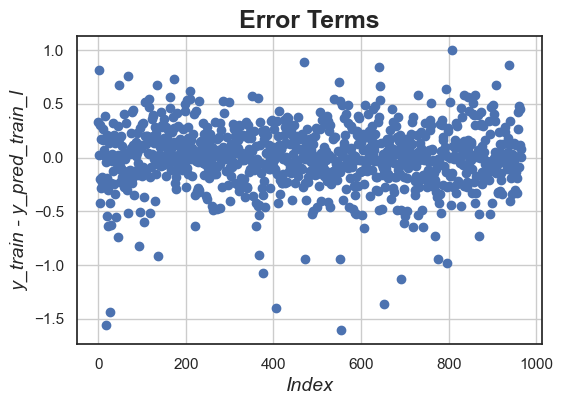

In [199]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,966,1)] #For 966 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

C:\Users\gouse\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


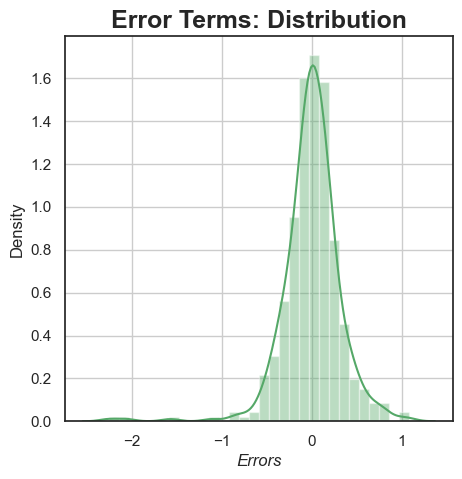

In [200]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

C:\Users\gouse\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


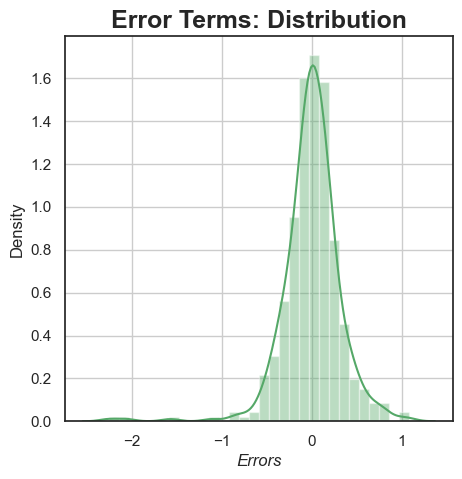

In [201]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

In [202]:
y_test.shape

(415,)

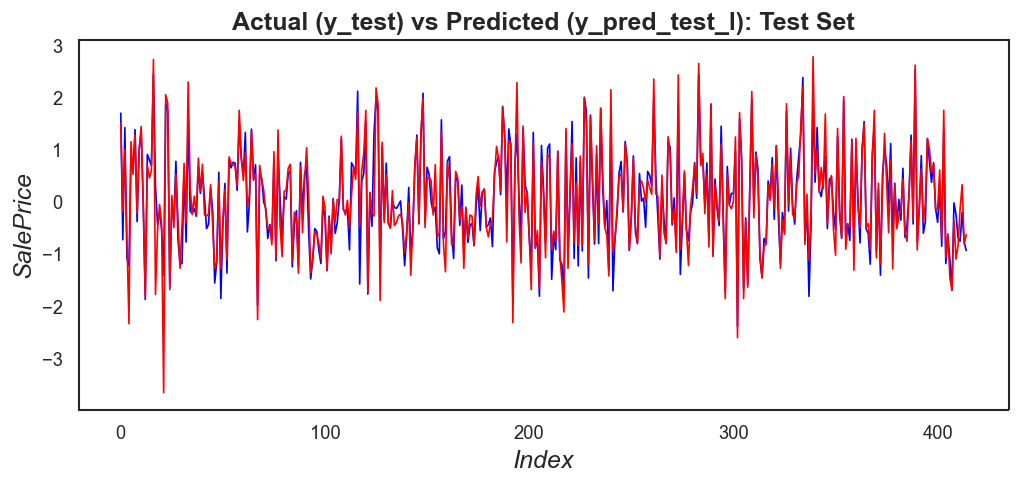

In [203]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p2 = [i for i in range(0,415,1)] #As test set has 415 observations
l2 = [i for i in range(0,415,1)]
plt.plot(p2, y_pred_test_l, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_l' plot(test pred)
plt.plot(l2, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_l): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

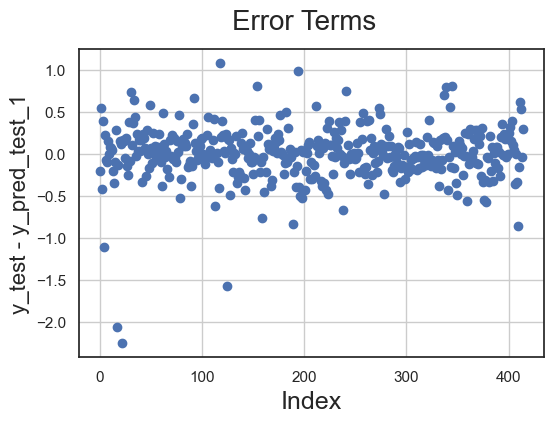

In [204]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,415,1)] #For 415 observations in the test set
res_test1 = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

# Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [205]:
##Optimal Value of alpha for ridge and lasso regression (importing values already computed)

optimal_alpha_ridge = 8.0        #(Computed Above: For Ridge Regression)
optimal_alpha_lasso = 0.001    #(Computed Above: For Lasso Regression)

# Changes to the model when we double the value of alpha for both ridge and lasso regression

Ridge Regression

In [206]:
##Checking the outcome: coefficient values with double the value of alpha = 8*2 = 16

ridge = Ridge(alpha=16)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.11854973282365884
Coefficients:
 [ 0.24138746  0.1550707   0.106605    0.14590219  0.35398268  0.10967311
 -0.27983345 -0.0449581   0.02220319  0.14620258  0.00312675 -0.13788529
 -0.19761039  0.07942254  0.19359941  0.17109041 -0.08436034 -0.04956196
  0.15469567 -0.05903985 -0.10906646 -0.12021324 -0.11332581 -0.0934609
 -0.00613165 -0.08519953  0.10240044 -0.10181601 -0.0785744  -0.04679664
  0.11543068  0.0157964  -0.05696199  0.06050948  0.02206435 -0.03080739
 -0.0241268   0.02785995 -0.01604771  0.05353363  0.05310131  0.05064093
  0.05776487 -0.02629786 -0.0316254   0.04488019 -0.05078516  0.04985311
 -0.07854378  0.11628371  0.03005757 -0.06240113 -0.09915507]


In [207]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha=8*2=16):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha=8*2=16):
 ****************************************

For Train Set:
R2 score: 0.9124083244810126 
MSE score: 0.08759167551898744 
MAE score: 0.21132723831535394 
RMSE score: 0.29595890849742545

For Test Set:
R2 score: 0.890816422211831 
MSE score: 0.10584628632243363 
MAE score: 0.21674574475485173 
RMSE score: 0.32534026237530705 
 ****************************************


In [208]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0             GrLivArea       0.3540                            0.3540
1         AgeofProperty      -0.2798                            0.2798
2           OverallQual       0.2414                            0.2414
3        MSSubClass_160      -0.1976                            0.1976
4           MSZoning_FV       0.1936                            0.1936
5           MSZoning_RL       0.1711                            0.1711
6           OverallCond       0.1551                            0.1551
7  Neighborhood_Crawfor       0.1547                            0.1547
8         MSSubClass_70       0.1462                            0.1462
9           TotalBsmtSF       0.1459                            0.1459

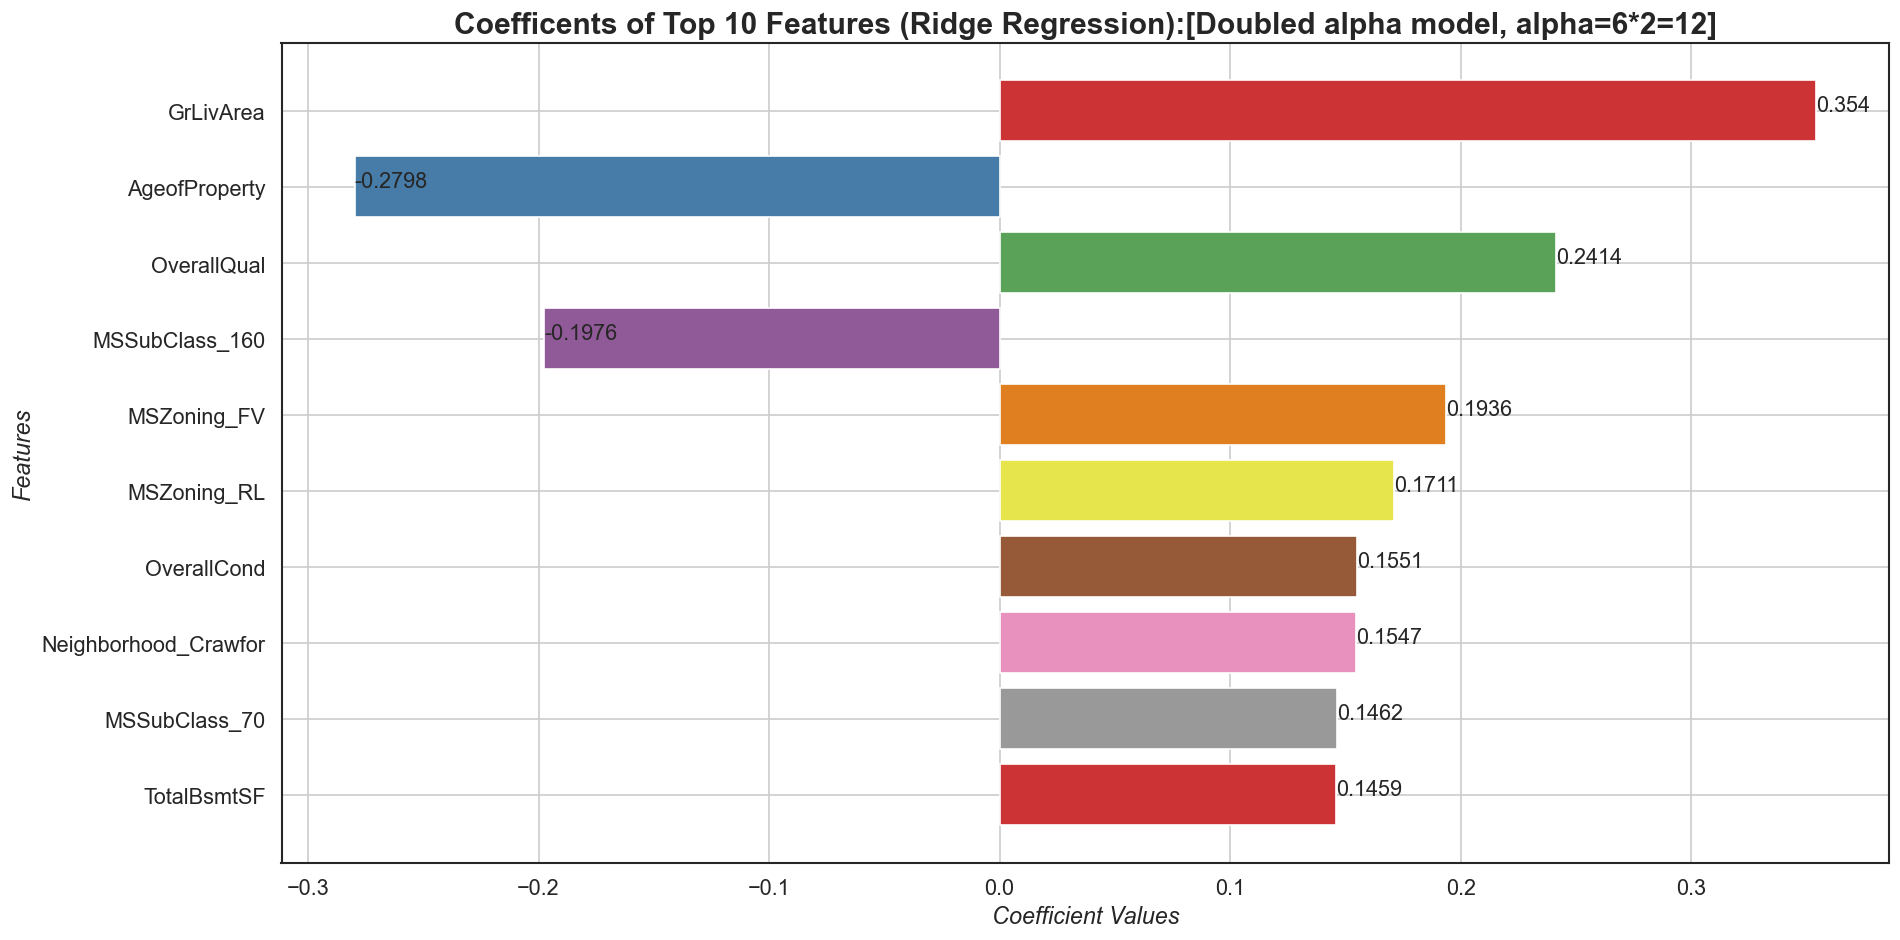

In [209]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):[Doubled alpha model, alpha=6*2=12]', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [210]:
print("For Ridge Regression (Doubled alpha model, alpha=8*2=16): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=8*2=16): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['GrLivArea', 'AgeofProperty', 'OverallQual', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RL', 'OverallCond', 'Neighborhood_Crawfor', 'MSSubClass_70', 'TotalBsmtSF'] 
 *****************************************************************************************************************************


In [211]:
##Checking the outcome: coefficient values with double the value of alpha = 0.001*2 = 0.002 (For Lasso Regression)

lasso = Lasso(alpha=0.002)
        
lasso.fit(X_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)

Intercept:  -0.14296941621039808
Coefficients:
  [ 0.24508015  0.15906491  0.1033792   0.14269101  0.36395035  0.10484645
 -0.29741209 -0.          0.          0.17268076 -0.         -0.15997114
 -0.27023352  0.06135903  0.27863115  0.18318947 -0.         -0.00806274
  0.21282449 -0.00281852 -0.04175771 -0.03742202 -0.0782025  -0.04382521
 -0.         -0.05300449  0.12035388 -0.04073871 -0.0249561  -0.
  0.1291858   0.         -0.          0.         -0.         -0.03833958
 -0.          0.00117418 -0.01694856  0.          0.          0.01933192
  0.02808716 -0.         -0.          0.         -0.          0.
 -0.          0.12761429  0.         -0.00636627 -0.09035215]


In [212]:
##RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)
 ****************************************

For Train Set:
R2 score: 0.9103833491485149 
MSE score: 0.08961665085148511 
MAE score: 0.21390423324765975 
RMSE score: 0.29936040294515426

For Test Set:
R2 score: 0.8921266018803106 
MSE score: 0.10457615344042848 
MAE score: 0.21604155431529326 
RMSE score: 0.32338236414564797 
 ****************************************


In [213]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0             GrLivArea       0.3640                            0.3640
1         AgeofProperty      -0.2974                            0.2974
2           MSZoning_FV       0.2786                            0.2786
3        MSSubClass_160      -0.2702                            0.2702
4           OverallQual       0.2451                            0.2451
5  Neighborhood_Crawfor       0.2128                            0.2128
6           MSZoning_RL       0.1832                            0.1832
7         MSSubClass_70       0.1727                            0.1727
8         MSSubClass_90      -0.1600                            0.1600
9           OverallCond       0.1591                            0.1591

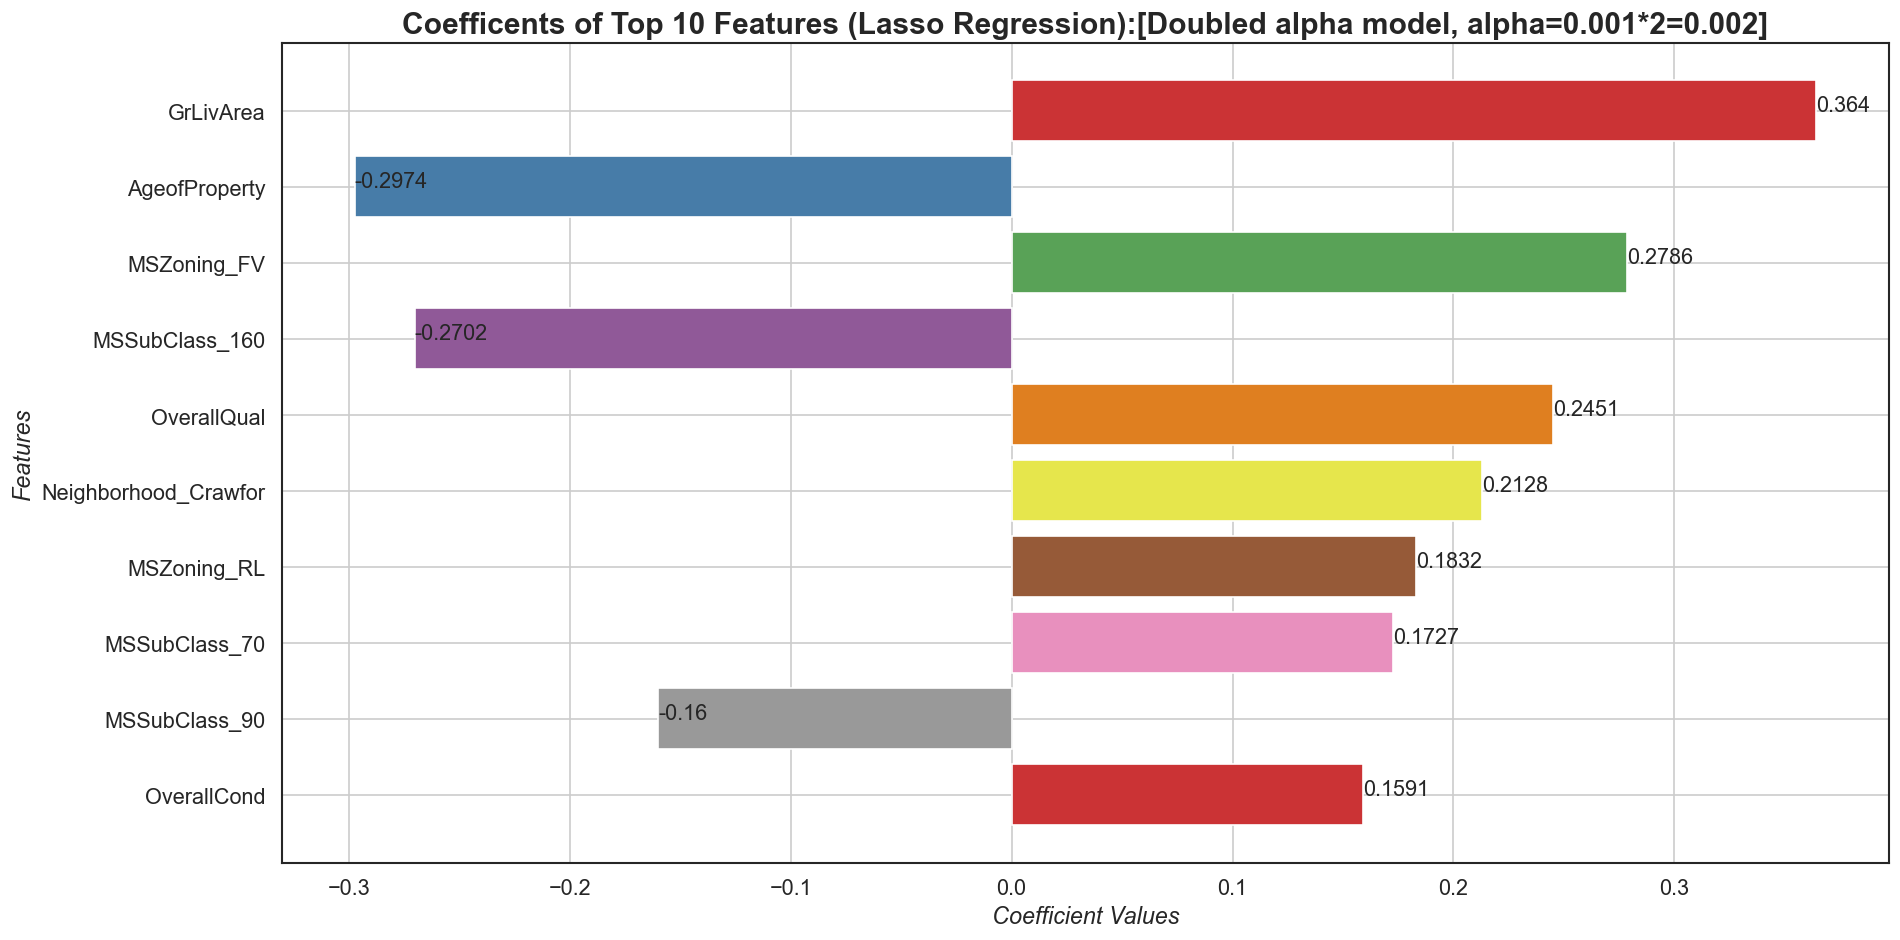

In [214]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):[Doubled alpha model, alpha=0.001*2=0.002]', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [215]:
print("For Lasso Regression (Doubled alpha model: alpha:0.001*2 = 0.002): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_lasso_df['Features']),"\n", "*"*125)

For Lasso Regression (Doubled alpha model: alpha:0.001*2 = 0.002): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['GrLivArea', 'AgeofProperty', 'MSZoning_FV', 'MSSubClass_160', 'OverallQual', 'Neighborhood_Crawfor', 'MSZoning_RL', 'MSSubClass_70', 'MSSubClass_90', 'OverallCond'] 
 *****************************************************************************************************************************


Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

(Solution in Subjective Questions pdf File)

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [216]:
##From Original Lasso Regression Model, import 'top5_original_lasso_features': Top5 features
print("Top 5 features in original lasso model (dropped):\n", top5_original_lasso_features)

df= df_new1

##Removing these top5 features (as per Original Lasso Model) from 'df'
df= df.drop(top5_original_lasso_features, axis=1)
df.head()

Top 5 features in original lasso model (dropped):
 ['GrLivArea', 'MSSubClass_160', 'Exterior1st_BrkComm', 'MSZoning_FV', 'AgeofProperty']


LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  BsmtFullBath  FullBath  ...  Exterior1st_AsphShn  \
0        150          856             1         2  ...                    0   
1        284         1262             0         2  ...                    0   
2        434          920             1         2  ...                    0   
3        540          756             1         1  ...                    0   
4        490         1145             1         2  ...                    0   

   Exterior1st_BrkFace  Exterior1st_ImStucc  Exterior1st_Stone  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   Exterior1st_WdShing  GarageType_Attchd  GarageType_Basment  \
0                    0                  1                   0   
1                    0                  1                   0   
2                    0                  1                   0   
3                    0                  0                   0   
4                    0                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_None  
0                   0                   0                0  
1                   0                   0                0  
2                   0                   0                0  
3                   0                   0                0  
4                   0                   0                0  

[5 rows x 103 columns]

In [217]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)

In [218]:
##split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [219]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols =df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler fit_transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [220]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [221]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

In [223]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [224]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('LotFrontage', False, 23),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 44),
 ('BsmtFinSF1', False, 21),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('BsmtFullBath', False, 34),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 38),
 ('Fireplaces', False, 13),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 24),
 ('OpenPorchSF', False, 40),
 ('d_LotShape', False, 49),
 ('d_BsmtQual', False, 17),
 ('d_BsmtExposure', False, 43),
 ('d_HeatingQC', False, 20),
 ('d_GarageFinish', False, 47),
 ('WhetherRemodelled', False, 45),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 37),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_85', False, 33),
 ('MSSubClass_90', False, 36),
 ('MSSubClass_120', False, 8),
 ('MSSubClass_180', False, 22),
 ('MSSubClass_190', Fals

In [225]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'FullBath', 'HalfBath', 'GarageArea', 'MSSubClass_30', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_Stone', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'RoofStyle_Gambrel', 

In [226]:
##Creating a dataframe for RFE supported top 50 indepedent variables. 

top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking']) # assign the 50 features selected using RFE to a dataframe and view them

top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)

top50_df

Features  rfe_support  rfe_ranking
0                LotArea         True            1
1            OverallQual         True            1
2            OverallCond         True            1
3              BsmtUnfSF         True            1
4            TotalBsmtSF         True            1
5               FullBath         True            1
6               HalfBath         True            1
7             GarageArea         True            1
8          MSSubClass_30         True            1
9          MSSubClass_45         True            1
10         MSSubClass_50         True            1
11         MSSubClass_60         True            1
12         MSSubClass_70         True            1
13         MSSubClass_75         True            1
14         MSSubClass_80         True            1
15         LotConfig_FR3         True            1
16  Neighborhood_Blueste         True            1
17   Neighborhood_BrDale         True            1
18  Neighborhood_BrkSide         True            1
19  Neighborhood_ClearCr         True            1
20  Neighborhood_CollgCr         True            1
21  Neighborhood_Edwards         True            1
22  Neighborhood_Gilbert         True            1
23   Neighborhood_IDOTRR         True            1
24  Neighborhood_MeadowV         True            1
25  Neighborhood_Mitchel         True            1
26    Neighborhood_NAmes         True            1
27  Neighborhood_NPkVill         True            1
28   Neighborhood_NWAmes         True            1
29  Neighborhood_OldTown         True            1
30    Neighborhood_SWISU         True            1
31   Neighborhood_Sawyer         True            1
32  Neighborhood_SawyerW         True            1
33  Neighborhood_StoneBr         True            1
34   Neighborhood_Timber         True            1
35  Neighborhood_Veenker         True            1
36   Exterior2nd_Brk Cmn         True            1
37   Exterior2nd_BrkFace         True            1
38     Exterior2nd_Stone         True            1
39     HouseStyle_2.5Fin         True            1
40     HouseStyle_2.5Unf         True            1
41       Foundation_Slab         True            1
42      Foundation_Stone         True            1
43       Foundation_Wood         True            1
44     RoofStyle_Gambrel         True            1
45     RoofStyle_Mansard         True            1
46   Exterior1st_BrkFace         True            1
47     Exterior1st_Stone         True            1
48     GarageType_Attchd         True            1
49    GarageType_BuiltIn         True            1
50    GarageType_CarPort         True            1

In [227]:
##Let's Assign top 50 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]

In [228]:
##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [229]:
##Lasso Regression Model Building
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [230]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
4       0.0004         -0.234603        -0.249433                1
5       0.0005         -0.235164        -0.249436                2
6       0.0006         -0.235789        -0.249604                3
3       0.0003         -0.234099        -0.249685                4
7       0.0007         -0.236476        -0.249986                5
2       0.0002         -0.233781        -0.250028                6
1       0.0001         -0.233524        -0.250332                7
8       0.0008         -0.237183        -0.250391                8
9       0.0009         -0.237918        -0.250709                9
0      0.00001         -0.233442        -0.250930               10
10       0.001         -0.238635        -0.251158               11
11       0.005         -0.258310        -0.264555               12
12        0.01         -0.270600        -0.274730               13
13        0.05         -0.296756        -0.299077               14
14         0.1         -0.323270        -0.324466               15
15         0.2         -0.384300        -0.386380               16
16         0.3         -0.453846        -0.456101               17
17         0.4         -0.518116        -0.520151               18
18         0.5         -0.579658        -0.581251               19
19         0.6         -0.636055        -0.637773               20
20         0.7         -0.697506        -0.699013               21
21         0.8         -0.761580        -0.762717               22
35         100         -0.775470        -0.775675               23
34          50         -0.775470        -0.775675               23
33          20         -0.775470        -0.775675               23
32        10.0         -0.775470        -0.775675               23
31         9.0         -0.775470        -0.775675               23
30         8.0         -0.775470        -0.775675               23
29         7.0         -0.775470        -0.775675               23
28         6.0         -0.775470        -0.775675               23
27         5.0         -0.775470        -0.775675               23
26         4.0         -0.775470        -0.775675               23
25         3.0         -0.775470        -0.775675               23
24         2.0         -0.775470        -0.775675               23
23         1.0         -0.775470        -0.775675               23
22         0.9         -0.775470        -0.775675               23
36         500         -0.775470        -0.775675               23
37        1000         -0.775470        -0.775675               23

In [231]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.00009, 0.00005, 0.00003, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 5e-05, 3e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [232]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
7       0.0004         -0.234603        -0.249433                1
8       0.0005         -0.235164        -0.249436                2
9       0.0006         -0.235789        -0.249604                3
6       0.0003         -0.234099        -0.249685                4
10      0.0007         -0.236476        -0.249986                5
5       0.0002         -0.233781        -0.250028                6
4       0.0001         -0.233524        -0.250332                7
11      0.0008         -0.237183        -0.250391                8
1      0.00009         -0.233510        -0.250392                9
2      0.00005         -0.233464        -0.250655               10
12      0.0009         -0.237918        -0.250709               11
3      0.00003         -0.233447        -0.250783               12
0      0.00001         -0.233442        -0.250930               13
13       0.001         -0.238635        -0.251158               14
14       0.005         -0.258310        -0.264555               15
15        0.01         -0.270600        -0.274730               16
16        0.02         -0.281924        -0.284801               17
17        0.05         -0.296756        -0.299077               18

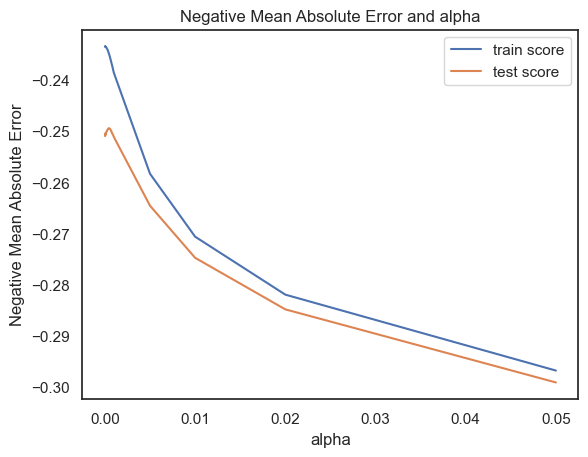

In [233]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()



In [234]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0004)

In [235]:
# check the coefficient values with (lambda) alpha = 0.0004

lasso = Lasso(alpha=0.0004)
        
lasso.fit(X_train, y_train) 
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  0.07431715783796386
Coefficients:
 [ 0.0926471   0.30806388  0.13154105 -0.11370126  0.37232273  0.12129829
  0.09604742  0.15533443 -0.25054433 -0.16516884  0.06830958  0.26612439
  0.21409518  0.11742489  0.1380627  -0.         -0.         -0.45722675
 -0.16785538 -0.1185155  -0.1437468  -0.24484494 -0.12444624 -0.60406659
 -0.47171482 -0.27744848 -0.35307704 -0.1282861  -0.3831782  -0.4700356
 -0.10417744 -0.353352   -0.18263243  0.11013361 -0.11340922 -0.05351115
 -0.43019045  0.09299622  0.1840264   0.18606487 -0.          0.35072838
  0.16691939 -0.02297198  0.09443847  0.09949095  0.09035724  0.
  0.10692656  0.33596369 -0.15096608]


In [236]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(5)  #New Top5 features display (Lasso Model: Reiterated)

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0   Neighborhood_IDOTRR      -0.6041                            0.6041
1  Neighborhood_MeadowV      -0.4717                            0.4717
2  Neighborhood_OldTown      -0.4700                            0.4700
3   Neighborhood_BrDale      -0.4572                            0.4572
4   Exterior2nd_Brk Cmn      -0.4302                            0.4302

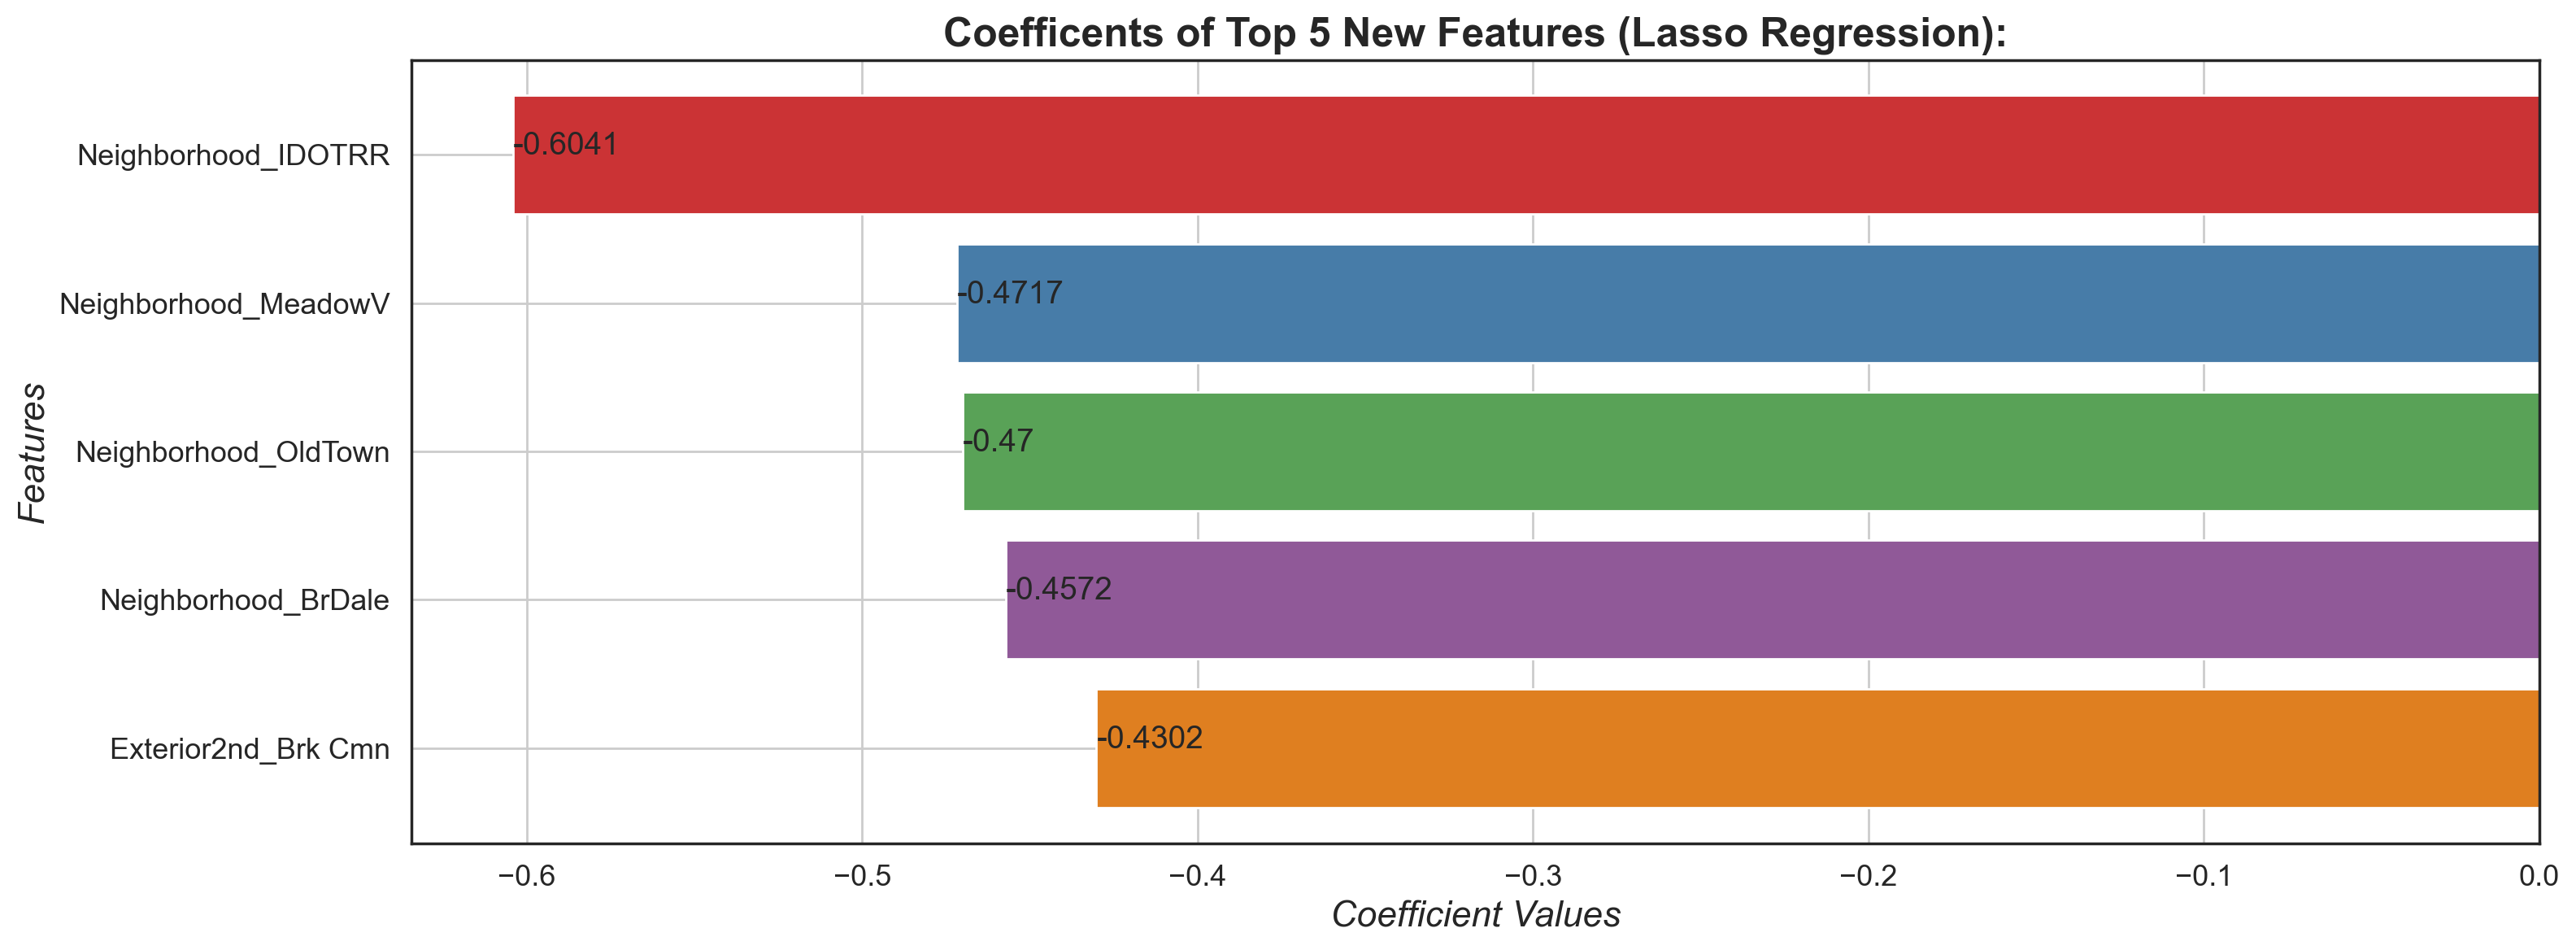

In [237]:
##Coefficient value plot (Lasso Regression)

top5_lasso_df= lasso_df.loc[:4] #'top5_lasso_df' datafram with top 5 features from the new model

sns.set(style='white')
plt.figure(figsize=(16,6), dpi=200)
ax4= sns.barplot(y=top5_lasso_df['Features'], x=top5_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 16, fontstyle='italic')
plt.ylabel('Features' , fontsize= 16, fontstyle='italic')
plt.title('Coefficents of Top 5 New Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top5_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=14)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [238]:
print("For New Lasso Regression Model (After eliminating the top5 features from the original model):\n","*"*125)
print("The top5 new most important predictor variables are as follows:\n\n",\
      list(top5_lasso_df['Features']),"\n", "*"*125)

For New Lasso Regression Model (After eliminating the top5 features from the original model):
 *****************************************************************************************************************************
The top5 new most important predictor variables are as follows:

 ['Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_OldTown', 'Neighborhood_BrDale', 'Exterior2nd_Brk Cmn'] 
 *****************************************************************************************************************************


Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Solution in the Subjective Questions pdf file